# Statistical Testing

In [4]:
import seaborn as sns
import os
import sys
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.stats as stats
from scipy.stats import zscore
# from scipy.stats import chi2_contingency

import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.stats.proportion import proportions_ztest,proportions_chisquare
# from statsmodels.stats.weightstats import zconfint, zconfint_mean
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

from scipy.stats import anderson


import sklearn
from sklearn.linear_model import LinearRegression

import pingouin as pg
from pingouin import kruskal, ttest
from statsmodels.multivariate.manova import MANOVA

from collections import Counter 
pd.set_option('display.max_rows', None, 'display.max_columns', None, 'display.width', None)  # Show all rows
# pd.set_option('display.max_columns', None)  # Show all columns
# pd.set_option('display.width', None)  # Allow full width of display
import plotly.graph_objs as go
from matplotlib.dates import DateFormatter


import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import statsmodels.api as sm

from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler



In [27]:
sys.path

['/Users/emilyli/opt/anaconda3/lib/python39.zip',
 '/Users/emilyli/opt/anaconda3/lib/python3.9',
 '/Users/emilyli/opt/anaconda3/lib/python3.9/lib-dynload',
 '',
 '/Users/emilyli/eli_py39/lib/python3.9/site-packages']

In [2]:
os.chdir('/Users/emilyli/workspace/datasets/')

In [96]:
# import the data
df= pd.read_csv("Iris.csv")
df.columns = df.columns.str.lower()
df['sepal_width'] = df['sepalwidthcm']
# df[''] = df['petallengthcm']
# df[''] = df['petalwidthcm']
# df[''] = df['sepallengthcm']



setosa = df[(df['species'] == 'Iris-setosa')]
versicolor = df[(df['species'] == 'Iris-versicolor')]
virginica = df[(df['species'] == 'Iris-virginica')]



In [97]:
df2= pd.read_csv("data_science_salaries.csv")

value_counts = df2['job_title'].value_counts()
filtered_counts = value_counts[value_counts >= 30]
filtered_counts
major_job_titles = filtered_counts.index.tolist()
# major_job_titles = [x.lower() for x in major_job_titles]
major_job_titles_df = df2[df2['job_title'].isin(major_job_titles)]

major_job_titles2 = [x for x in major_job_titles if 'scientist' in x.lower() or 'ml' in x.lower() or 'machine learning' in x.lower() ]
major_job_titles_df2 = df2[df2['job_title'].isin(major_job_titles2)]

In [98]:
df3= pd.read_csv("factors_affect_children_anemia.csv")
df3.shape
df3.columns = df3.columns.str.lower()
df3.rename(columns=lambda x: x.replace(' ', '_').replace('.', '_'), inplace=True)



In [6]:
df3.head()

,age_in_5-year_groups,type_of_place_of_residence,highest_educational_level,wealth_index_combined,births_in_last_five_years,age_of_respondent_at_1st_birth,hemoglobin_level_adjusted_for_altitude_and_smoking_(g/dl_-_1_decimal),anemia_level,have_mosquito_bed_net_for_sleeping_(from_household_questionnaire),smokes_cigarettes,current_marital_status,currently_residing_with_husband/partner,when_child_put_to_breast,had_fever_in_last_two_weeks,hemoglobin_level_adjusted_for_altitude_(g/dl_-_1_decimal),anemia_level_1,"taking_iron_pills,_sprinkles_or_syrup"
0,40-44,Urban,Higher,Richest,1,22,NaN,NaN,Yes,No,Living with partner,Staying elsewhere,Immediately,No,NaN,NaN,Yes
1,35-39,Urban,Higher,Richest,1,28,NaN,NaN,Yes,No,Married,Living with her,Hours: 1,No,NaN,NaN,No
2,25-29,Urban,Higher,Richest,1,26,NaN,NaN,No,No,Married,Living with her,Immediately,No,NaN,NaN,No
3,25-29,Urban,Secondary,Richest,1,25,95.0,Moderate,Yes,No,Married,Living with her,105.0,No,114.0,Not anemic,No
4,20-24,Urban,Secondary,Richest,1,21,NaN,NaN,Yes,No,No longer living together/separated,NaN,Immediately,No,NaN,NaN,No


In [7]:
df3['anemia_level_1'].value_counts(dropna=False)

anemia_level_1
NaN           23742
Moderate       3927
Not anemic     3179
Mild           2754
Severe          322
Name: count, dtype: int64

In [8]:
df3.columns

Index(['age_in_5-year_groups', 'type_of_place_of_residence',
       'highest_educational_level', 'wealth_index_combined',
       'births_in_last_five_years', 'age_of_respondent_at_1st_birth',
       'hemoglobin_level_adjusted_for_altitude_and_smoking_(g/dl_-_1_decimal)',
       'anemia_level',
       'have_mosquito_bed_net_for_sleeping_(from_household_questionnaire)',
       'smokes_cigarettes', 'current_marital_status',
       'currently_residing_with_husband/partner', 'when_child_put_to_breast',
       'had_fever_in_last_two_weeks',
       'hemoglobin_level_adjusted_for_altitude_(g/dl_-_1_decimal)',
       'anemia_level_1', 'taking_iron_pills,_sprinkles_or_syrup'],
      dtype='object')

# Test Hypothesis Testing Assumptions

In [47]:
# homogeneity of variance
# Homogeneity of variance test:
# Null hypothesis (H0): The variances of the groups are equal (homogeneity of variance).
# Alternative hypothesis (H1): The variances of the groups are not equal (heterogeneity of variance).

stats.levene(setosa['sepal_width'], versicolor['sepal_width'])

LeveneResult(statistic=0.6635459332943233, pvalue=0.4172859681296204)

In [48]:
# homoscedasticity test: levene test
# missing value are not supported, need either pandas.DataFrame.dropna() or pingouin.remove_na() functions.
pg.homoscedasticity(df2, dv="salary_in_usd", group="job_title")
pg.homoscedasticity(df2, dv="salary_in_usd", group="job_title", center= "mean")
pg.homoscedasticity(df2, method="bartlett", alpha=.05)


,T,pval,equal_var
bartlett,184075.1625,0.0,False


In [30]:
df_num = df.select_dtypes(include=['number'])
df_num.corr()



,id,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,sepal_width
id,1.000000,0.716676,-0.397729,0.882747,0.899759,-0.397729
sepallengthcm,0.716676,1.000000,-0.109369,0.871754,0.817954,-0.109369
sepalwidthcm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544,1.000000
petallengthcm,0.882747,0.871754,-0.420516,1.000000,0.962757,-0.420516
petalwidthcm,0.899759,0.817954,-0.356544,0.962757,1.000000,-0.356544
sepal_width,-0.397729,-0.109369,1.000000,-0.420516,-0.356544,1.000000


In [44]:
# sns.pairplot(data=df, height = 1.5)



In [31]:
# homogeneity of variance
stats.levene(virginica['sepal_width'], versicolor['sepal_width'])


LeveneResult(statistic=0.08726625111308971, pvalue=0.7683067284841042)

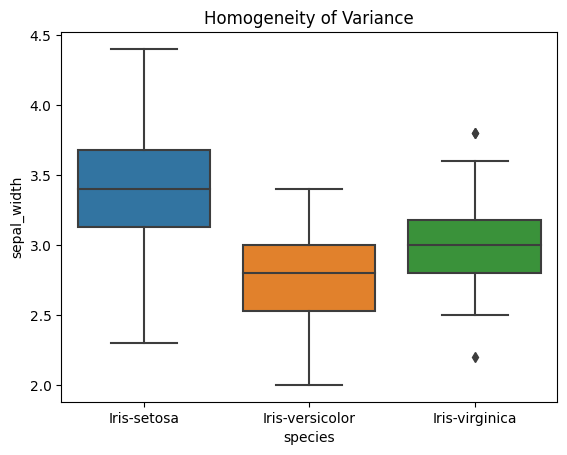

In [32]:
sns.boxplot(x='species', y='sepal_width', data=df)
plt.title('Homogeneity of Variance')
plt.show()


In [34]:
# Shapiro-Wilk test for normality

# Normality test:
# Null hypothesis (H0): The data follows a normal distribution.
# Alternative hypothesis (H1): The data does not follow a normal distribution.
# Shapiro-Wilk test, Kolmogorov-Smirnov test, or Anderson-Darling test are often used to assess whether the data significantly deviates 
# from a normal distribution. If the p-value from these tests is less than a chosen significance level (often denoted as α), the null hypothesis 
# of normality is rejected, indicating that there is evidence to suggest that the data does not follow a normal distribution.
stats.shapiro(setosa['sepal_width'])


ShapiroResult(statistic=0.9686915278434753, pvalue=0.20464898645877838)

In [ ]:
stats.shapiro(versicolor['sepal_width'])

ShapiroResult(statistic=0.9741329550743103, pvalue=0.3379843533039093)

In [ ]:
# Anderson-Darling Test:
# Similar to the Shapiro-Wilk test, the Anderson-Darling test is another statistical test used to assess normality.

# Assuming 'data' is your numerical data
result = anderson(df)
print("Anderson-Darling Test Statistic:", result.statistic)
print("Critical Values:", result.critical_values)

# Interpret the result
alpha = 0.05
if result.statistic < result.critical_values[2]:
    print("Sample looks Gaussian (fail to reject H0)")
else:
    print("Sample does not look Gaussian (reject H0)")



# 1 Sample Z-Test (Inference to Population Mean)

In [9]:
# from scipy import stats

# Sample data
# sample_data = [20, 22, 18, 17, 23, 21, 19, 25, 24, 20]

sample_mean = 110
population_mean = 100
# population_var = 
# population_std = np.sqrt(population_var)
population_std = 15
sample_size = 50
alpha = 0.05
# Population mean (hypothesized mean)
population_mean = 22  # Hypothesized population mean
alpha = 0.05


z_critical = stats.norm.ppf(1-alpha)
z_critical

z_score = (sample_mean-population_mean)/(population_std/np.sqrt(sample_size))
z_score
# P-Value : Probability of getting less than a Z-score
p_value = 1-stats.norm.cdf(z_score)
 
print('z_critical:', z_critical, 'z_score:',  z_score, 'p_value:', p_value)

# Hypothesis
if z_score >  z_critical:
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

# Perform 1-sample z-test for mean
# z_statistic, p_value = stats.ztest(sample_data, value=population_mean)

# print("Z-statistic:", z_statistic)
# print("P-value:", p_value)

z_critical: 1.6448536269514722 z_score: 41.483597829610794 p_value: 0.0
Reject Null Hypothesis


In [409]:
np.sqrt(9)

3.0

# 2 Samples Mean Z-Test 

In [10]:
# n = sample size, x = sample mean, s = sample stdev
# Group A (Offline Classes)
n1 = 50
x1 = 75
s1 = 10
 
# Group B (Online Classes)
n2 = 60
x2 = 80
s2 = 12
 
# Null Hypothesis = mu_1-mu_2 = 0 
# Hypothesized difference (under the null hypothesis)
D = 0
 
# Set the significance level
alpha = 0.05
 
# Calculate the test statistic (z-score)
z_score = ((x1 - x2) - D) / np.sqrt((s1**2 / n1) + (s2**2 / n2))
print('Z-Score:', np.abs(z_score))

    # P-Value : Probability of getting less than a Z-score
p_value = 2 * (1 - stats.norm.cdf(np.abs(z_score)))
print('P-Value :',p_value)
 
    
# Calculate the critical value
z_critical = stats.norm.ppf(1 - alpha/2)
print('Critical Z-Score:',z_critical)
 
# print('z_critical:', z_critical, 'z_score:',  np.abs(z_score), 'p_value:', p_value)
 
# compare the test statistic with the critical value
if np.abs(z_score) > z_critical:
    print("""Reject the null hypothesis.
There is a significant difference between Group A & Group B.""")
else:
    print("""Fail to reject the null hypothesis.
There is not enough evidence to suggest a significant difference between Group A & Group B.""")


# Compare the p-value with the significance level
if p_value < alpha:
    print("""Reject the null hypothesis.
There is a significant difference between Group A & Group B.""")
else:
    print("""Fail to reject the null hypothesis.
There is not enough evidence to suggest significant difference between Group A & Group B.""")

Z-Score: 2.3836564731139807
P-Value : 0.01714159544079563
Critical Z-Score: 1.959963984540054
Reject the null hypothesis.
There is a significant difference between Group A & Group B.
Reject the null hypothesis.
There is a significant difference between Group A & Group B.


# 1 Sample Proportion Z-Test

In [11]:
# H0: p = p0 (population proportion is equal to hypothesized proportion p0)
# H1 (two-tailed): p ≠ p0 (two-tailed population proportion is not equal to some hypothesized value p0)
# H1 (left-tailed): p < p0 (left-tailed population proportion is less than some hypothesized value p0)
# H1 (right-tailed): p > p0 (right-tailed population proportion is greater than some hypothesized value p0)
# P: Observed sample proportion
# Po: Hypothesized Population Proportion
# n: Sample size 

P = 0.86 #obs sample proportion
Po = 0.80  
n = 100
a = (P-Po) 
b = Po*(1-Po)/n 
z = a/math.sqrt(b) 
print('Z-Stats:', z) 
# count: the number of successes in nobs trials. If this is array_like, then the assumption is that this represents the number of successes 
# for each independent sample
# nobs: the number of trials or observations, with the same length as count.
# value: This is the value of the H0 equal to the proportion in the case of a one sample test. In the case of a two-sample test, 
# the null hypothesis is that prop[0] - prop[1] = value, where prop is the proportion in the two samples. 
# If not provided value = 0 and the null is prop[0] = prop[1]
# proportions_ztest(count, nobs, value=None, alternative=’two-sided’) 
count = 80
nobs = 100
value = 0.86  #hypothesize population porportion
stat, pval = proportions_ztest(count, nobs, value)
print('Z-Stats::', stat, 'pval:', pval )
# print('{0:0.3f}'.format(pval))

Z-Stats: 1.4999999999999984
Z-Stats:: -1.4999999999999984 pval: 0.1336144025377165


# 2 Samples Proportion Z-Test
### random samples, independent, binom approx. to ~N

In [419]:
# H0; p1 -p2 = 0, or p1 = p2; h1: p1-p2 !=0, p1!=p2,
# SE: std error = sqrt(p^(1-p^)/n), where p^ = (x1+x2)/(n1+n2)
# proportions_ztest(count, nobs, value=None, alternative='two-sided', prop_var=False)
# count =nbr of success,
# nobs = nbr of observation, count & nobs has to be in the list format
count = np.array([5, 12])
nobs = np.array([83, 99])
stat, pval = proportions_ztest(count, nobs)
print('stat:', stat, 'pval:', pval )



0.159
stat: -1.4078304151258787 pval: 0.15918129181156992


# 2 Samples Proportion Chisq-Test

In [12]:
count = np.array([5, 12])
nobs = np.array([83, 99])
chi2, pval, cont_table = proportions_chisquare(count, nobs)
print('stat:', chi2, 'pval:', pval, 'cont_tabl:', cont_table )



stat: 1.9819864777535043 pval: 0.15918129181156587 cont_tabl: (array([[ 5., 78.],
       [12., 87.]]), array([[ 7.75274725, 75.24725275],
       [ 9.24725275, 89.75274725]]))


In [13]:
# chi2_contingency() also applicable for proportion in 2x2
contingency_table = np.array([[5, 12], [83, 99]])
# Apply chi-square test, expected is the expected frequency during computation as would used to compared w/ the observed
# chi-square statistic, which measures the discrepancy between the observed and expected frequencies.
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Statistic': [chi2_stat],
    'p-value': [p_value],
    'Degrees of Freedom': [dof]
})

# print(expected.round())
np.set_printoptions(suppress=True)
display(results_df) #chisq test result

print('expected:\n', expected.round()) #expected occurence
print('obs:\n', contingency_table) #obseerved occurence


,Statistic,p-value,Degrees of Freedom
0,1.061447,0.302885,1


expected:
 [[  8.   9.]
 [ 80. 102.]]
obs:
 [[ 5 12]
 [83 99]]


# Confidence Intervals (CI)
###  widely used in hypothesis testing, parameter estimation, and comparing different groups or treatments.

## %CI using Z-Stats (N >= 30)

In [14]:
	
# ppf: Percent point function (inverse of cdf — percentiles).
# Find the z critical value for a 99% confidence interval (two-tailed)
ci_lower, ci_upper = stats.norm.ppf(0.005), stats.norm.ppf(0.995)
display(ci_lower, ci_upper )

-2.575829303548901

2.5758293035489004

In [15]:
# 95% CI using Z-statistics
#define sample data
np.random.seed(0)
data = np.random.randint(10, 30, 50)
# data = 
print('data:', data)
print('mean:', np.mean(data))
print('Stdev:', np.std(data))
print('N:', len(data))

#create 95% confidence interval for population mean weight
# use either keyword arg or positional arg method, not both. below is keyword arg
# stats.norm.interval(confidence=0.95, loc=np.mean(data), scale=stats.sem(data))

loc = np.mean(data)
scale = stats.sem(data)
# below is positional arg
stats.norm.interval(0.95, loc, scale)

data: [22 25 10 13 13 17 19 29 28 14 16 22 11 16 17 24 27 15 23 18 19 29 26 29
 15 25 25 10 28 13 27 29 29 29 24 17 10 11 19 10 20 13 21 28 12 10 10 14
 15 16]
mean: 19.24
Stdev: 6.571331676304279
N: 50


(17.400060940568054, 21.079939059431943)

## %CI using T-Stats (N < 30)

In [16]:
# 95% CI using t-statistics
# df = degree of freedom

#create 95% confidence interval for population mean weight
# loc = mean of the data, default = 0
# scale = stdev of the data, default = 1, standard error of mean
# moment (optional): moment to compute, default = 'mv', both mean & variance
data = [12, 12, 13, 13, 15, 16, 17, 22, 23, 25, 26, 27, 28, 28, 29]
print('mean:', np.mean(data))
print('Stdev:', np.std(data))
print('N:', len(data))

stats.t.interval(confidence = 0.95, df=len(data)-1, loc=np.mean(data), scale=stats.sem(data)) 


mean: 20.4
Stdev: 6.354001363970055
N: 15


(16.75776979778498, 24.042230202215016)

# Prediction Interval (PI)
### regresion modele, making predictions for individual new observations, especially in machine learning and forecasting tasks.

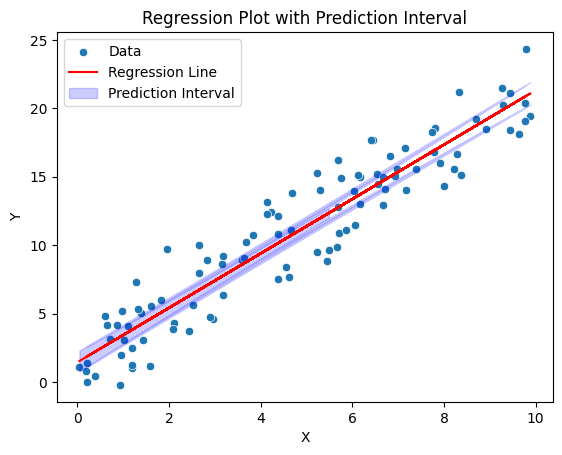

In [17]:
# 95%PI: A 95% prediction interval, on the other hand, estimates the range in which a future observation is likely to fall, with 95% confidence.
# regression model
# Sample data
np.random.seed(0)
X = np.random.rand(100) * 10
y = 2 * X + 1 + np.random.randn(100) * 2  # True relationship: y = 2*X + 1 + noise

# Fit linear regression model
X_with_intercept = sm.add_constant(X)  # Add intercept term
model = sm.OLS(y, X_with_intercept).fit()

# Get prediction intervals
prediction_results = model.get_prediction(X_with_intercept)

# Extract predicted values and prediction intervals
predicted_values = prediction_results.predicted_mean
prediction_intervals = prediction_results.conf_int()

# Plot data points
sns.scatterplot(x=X, y=y, label='Data')

# Plot regression line
plt.plot(X, predicted_values, color='red', label='Regression Line')

# Plot prediction intervals
plt.fill_between(X, prediction_intervals[:, 0], prediction_intervals[:, 1], color='blue', alpha=0.2, label='Prediction Interval')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regression Plot with Prediction Interval')
plt.legend()

# Show plot
plt.show()


In [144]:
# print(len(prstd), len( iv_l), len(iv_u))

In [ ]:
print(len(X))

In [ ]:
plt.plot(X, y, color='red', label='Regression Line')

plt.xlabel('X')
plt.ylabel('Y')
plt.fill_between(x, iv_l, iv_u, color='blue', alpha=0.2, label='Prediction Interval')
plt.title('Regression Plot with Prediction Interval')
plt.legend()

# Show plot
plt.show()

# Chi-Squared Test (Parametric)
### test association between the two categorical variables. H0: no association, H1: yes association, larger sample size per cell
### Multiple Levels per each Categorical feature

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df3['wealth_index_combined'], df3['anemia_level_1'])
# Apply chi-square test, expected is the expected frequency during computation as would used to compared w/ the observed
# chi-square statistic, which measures the discrepancy between the observed and expected frequencies.
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Statistic': [chi2_stat],
    'p-value': [p_value],
    'Degrees of Freedom': [dof]
})

# print(expected.round())
np.set_printoptions(suppress=True)
display(expected.round()) #expected occurence
display(results_df) #chisq test result
display(contingency_table) #obseerved occurence

# Chi-Squared Test Parametric for Pairwise Categorical Features 
### Multiple Levels per each Categorical feature

In [ ]:
columns = df3.columns
key_col = 'anemia_level_1'
rest_col = [x for x in columns if x not in key_col]
# np.set_printoptions(suppress=True)
# Perform chi-square test for every pair of categorical features
for i, col in enumerate(rest_col):
    # print(df3[col])
    contingency_table = pd.crosstab(df3[col], df3[key_col])
    chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
    
    # Create a DataFrame to store the results
    results_df = pd.DataFrame({
        'Statistic': [chi2_stat],
        'p-value': [p_value],
        'Degrees of Freedom': [dof]})

    print(f"Chi-square test between {col} and {key_col}:")
    display(results_df) #chisq test result
    # display(expected.round()) #expected occurence
    # display(contingency_table) #obseerved occurence

# None-Parametric for Pairwise Categorical Features 
### small sample size,  (2x2) table, eexpect cnt < 5,chisq assumption not met

In [19]:
# (H0): There is no association between the two categorical variables. (H1): There is an association between the two categorical variables.
# Fisher's Exact requires under the assumption that both row and column sums are fixed,
table = [[7, 17], [15, 5]]
res = stats.fisher_exact(table, alternative='less')
print('Statistic:', res.statistic , 'pval:', res.pvalue)



Statistic: 0.13725490196078433 pval: 0.0028841933752349743


In [20]:
# Boschloo’s test does not depend on the assumption that the row sums are fixed
res = stats.boschloo_exact(table, alternative='less')
print('Statistic:', res.statistic , 'pval:', res.pvalue)


Statistic: 0.0028841933752349743 pval: 0.0015141406667567101


In [21]:
# Cochran–Mantel–Haenszel test (CMH) is also (2,2) table


# F-Test :compare Variance of Two Groups

In [24]:
# F-test: 1-way ANOVA, stats.f_oneway() = pg.anova()
# measures the ratio of the variance between the groups to the variance within the groups. evaluates whether the variability within each group is similar or not.
# It is used to test whether the means of the groups are significantly different. (MSB / MSW)
# (H0): The variances of the two groups are equal.
# (H1): The variances of the two groups are not equal.

# setosa = df[(df['species'] == 'Iris-setosa')]
# versicolor = df[(df['species'] == 'Iris-versicolor')]
# virginica = df[(df['species'] == 'Iris-virginica')]
# as compared tto pg.anova() result
numerical_var = 'sepallengthcm'

print('Testing Variance of Two Groups:')
f_statistic, p_value = stats.f_oneway(setosa[numerical_var], versicolor[numerical_var], )
print(f_statistic, p_value )
f_statistic, p_value = stats.f_oneway(versicolor[numerical_var], virginica[numerical_var])
print(f_statistic, p_value )
f_statistic, p_value = stats.f_oneway(setosa[numerical_var],  virginica[numerical_var])
print(f_statistic, p_value )

print('ANOVA Test:')
aov = pg.anova(data=df, dv='sepallengthcm', between='species', detailed=True)
print(aov)

print('F Test:')
f_statistic, p_value = stats.f_oneway(setosa[numerical_var], versicolor[numerical_var], virginica[numerical_var])
print(f_statistic, p_value )

Testing Variance of Two Groups:
110.69115204195691 8.985235037487287e-18
31.687501521236467 1.724856302454671e-07
236.7350218138295 6.892546060673547e-28
ANOVA Test:
    Source         SS   DF         MS           F         p-unc       np2
0  species  63.212133    2  31.606067  119.264502  1.669669e-31  0.618706
1   Within  38.956200  147   0.265008         NaN           NaN       NaN
F Test:
119.26450218450468 1.6696691907693826e-31


In [25]:
df.columns

Index(['id', 'sepallengthcm', 'sepalwidthcm', 'petallengthcm', 'petalwidthcm',
       'species', 'sepal_width'],
      dtype='object')

In [26]:


df.columns

Index(['id', 'sepallengthcm', 'sepalwidthcm', 'petallengthcm', 'petalwidthcm',
       'species', 'sepal_width'],
      dtype='object')

# Correlation Analysis
### Measures the strength and direction of the linear relationship between two continuous variables.

# 1 Sample T-Tests

In [36]:
# y: Second set of observations. If y is a single value, a one-sample T-test is computed against that value (= “mu” in the t.test R function)
# mu = population mean
mu = 4
x = [5.5, 2.4, 6.8, 9.6, 4.2]
ttest(x, mu).round(2)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.4,4,two-sided,0.23,"[2.32, 9.08]",0.62,0.766,0.19


# 2 Samples T-Tests (Parametric, Independent)
### norm distr & homogeneity of variances, unknown variance assumption (pooled/unpooled)

In [49]:
# independent t-test - parametric, test significant difference between the means of two independent groups
# scipy.stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=None, alternative='two-sided', trim=0, *, keepdims=False)
 # equal_var=True is default, assume equal var: stats.ttest_ind( equal_var=True)
stats.ttest_ind(setosa['sepal_width'], versicolor['sepal_width'])
stats.ttest_ind(setosa['sepal_width'], versicolor['sepal_width'],  equal_var=True)



Ttest_indResult(statistic=9.282772555558111, pvalue=4.362239016010214e-15)

In [145]:
# y: Second set of observations. If y is a single value, a one-sample T-test is computed against that value (= “mu” in the t.test R function)
# alternative:  “two-sided” (default), “greater” or “less”. Both “greater” 
# pg way
# x = 
# y = 
ttest(x = setosa['sepal_width'], y = versicolor['sepal_width'], alternative='two-sided').round(2)


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,9.28,98,two-sided,0.0,"[0.51, 0.79]",1.86,1.079e+12,1.0


# 2 Samples T-Tests (Parametric, Paired)
### norm distr of pairs diff, unknown variance assumption

In [431]:
# paired t-test - parametric, performs a paired two-sample t-test, also known as the Student's t-test for paired samples
# test significant difference between the means of two related groups, before-and-after measurements or matched pairs.
# ttest_rel(pre, post, nan_policy="omit")
stats.ttest_rel(setosa['sepal_width'], versicolor['sepal_width'])


TtestResult(statistic=8.846695040854682, pvalue=9.989211333619151e-12, df=49)

In [39]:
# pg way
ttest(setosa['sepal_width'], versicolor['sepal_width'], paired=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,8.846695,49,two-sided,9.989211e-12,"[0.5, 0.8]",1.856555,9.155e+08,1.0


# 2 Samples T-Tests (Parametric, Unequal Variance, Welch's T-Test)
### norm distr & unequal of variances, unknown variance assumption,

In [40]:
# eql or uneql just need to use the additional arg of the same func for independent 2 samples ttest: stats.ttest_ind( equal_var=False)
stats.ttest_ind(setosa['sepal_width'], versicolor['sepal_width'], equal_var=False)


Ttest_indResult(statistic=9.28277255555811, pvalue=5.879601468409086e-15)

In [41]:
# # pg way
# correction: For unpaired two sample T-tests, specify whether or not to correct for unequal variances using Welch separate variances T-test. If ‘auto’,
# it will automatically uses Welch T-test when the sample sizes are unequal
# correction=False: Welch disable, correction=True: Welch enable,  correction='auto', use Welch when unequal variance
# ttest(setosa['sepal_width'], versicolor['sepal_width'], alternative='two-sided', correction=True).round(2)
ttest(setosa['sepal_width'], versicolor['sepal_width'], alternative='two-sided', correction='auto').round(2)


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,9.28,98,two-sided,0.0,"[0.51, 0.79]",1.86,1.079e+12,1.0


# Non-Parametric T-Tests (Wilcoxon = Paired, MannWhitney U = Independent)

In [42]:

# independent t-test - nonparametric
stats.wilcoxon(setosa['sepal_width'], versicolor['sepal_width'])


/Users/emilyli/eli_py39/lib/python3.9/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


WilcoxonResult(statistic=34.0, pvalue=3.0906620533922174e-08)

In [43]:
stats.mannwhitneyu(setosa['sepal_width'], versicolor['sepal_width'])

MannwhitneyuResult(statistic=2305.5, pvalue=2.983442275346375e-13)

# Chi-Squared Test

In [64]:
major_job_titles_df2[['job_title', 'experience_level']].value_counts()

job_title                                 experience_level
Data Scientist                            Senior-level        794
Machine Learning Engineer                 Senior-level        472
Data Scientist                            Mid-level           329
Machine Learning Engineer                 Mid-level           122
Research Scientist                        Senior-level        121
Data Scientist                            Entry-level          97
ML Engineer                               Senior-level         84
Applied Scientist                         Senior-level         76
Research Scientist                        Mid-level            63
Machine Learning Scientist                Senior-level         52
Machine Learning Engineer                 Entry-level          29
Machine Learning Infrastructure Engineer  Senior-level         27
ML Engineer                               Mid-level            24
Data Scientist                            Executive-level      23
Research Scientis

In [65]:

# Example DataFrame
data = pd.DataFrame({
    'Category1': ['A', 'A', 'B', 'B', 'A', 'B'],
    'Category2': ['X', 'Y', 'Y', 'X', 'X', 'Y'],
    'Numeric1': [1, 2, 3, 4, 5, 6],
    'Numeric2': [7, 8, 9, 10, 11, 12]
})

# Binning or categorizing Numeric1 and Numeric2
# For simplicity, let's categorize them into two bins each
data['Numeric1_bin'] = pd.cut(data['Numeric1'], bins=2, labels=['Low', 'High'])
data['Numeric2_bin'] = pd.cut(data['Numeric2'], bins=2, labels=['Low', 'High'])

# Create a contingency table
contingency_table = pd.crosstab(data['Category1'], data['Category2'])

# Apply chi-square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(chi2_stat, p_value, dof, expected )

0.0 1.0 1 [[1.5 1.5]
 [1.5 1.5]]


In [66]:
data

,Category1,Category2,Numeric1,Numeric2,Numeric1_bin,Numeric2_bin
0,A,X,1,7,Low,Low
1,A,Y,2,8,Low,Low
2,B,Y,3,9,Low,Low
3,B,X,4,10,High,High
4,A,X,5,11,High,High
5,B,Y,6,12,High,High


In [67]:
contingency_table

Category2,X,Y
Category1,,
A,2,1
B,1,2


In [68]:
# anova test
# Run the ANOVA
# homogeneity normality and independent assumptions
aov = pg.anova(data=df2, dv='salary_in_usd', between='experience_level', detailed=True)
print(aov)
result = df2.groupby('experience_level')['salary_in_usd'].describe().sort_values(by='mean', ascending=False)

median_salary = df2.groupby('experience_level')['salary_in_usd'].median()
median_salary
# Add median statistics to the sorted result DataFrame
result['median'] = median_salary
result

             Source            SS    DF            MS           F   
0  experience_level  4.903548e+12     3  1.634516e+12  380.809147  \
1            Within  2.830718e+13  6595  4.292218e+09         NaN   

           p-unc      np2  
0  4.075129e-228  0.14765  
1            NaN      NaN  


,count,mean,std,min,25%,50%,75%,max,median
experience_level,,,,,,,,,
Executive-level,254.0,189687.346457,71571.166828,15000.0,136000.0,184560.0,230000.0,465000.0,184560.0
Senior-level,4105.0,162071.063581,64444.875091,15809.0,118000.0,153600.0,199200.0,750000.0,153600.0
Mid-level,1675.0,119019.812537,71783.359309,15000.0,73523.0,106500.0,150000.0,750000.0,106500.0
Entry-level,565.0,84448.916814,48758.315152,15000.0,49646.0,75000.0,110000.0,350000.0,75000.0


In [69]:
res = stats.chi2_contingency(table)
print('Statistic:', res.statistic , 'pval:', res.pvalue)


Statistic: 7.425000000000001 pval: 0.006432382518660417


In [70]:
# homogeneity normality and independent assumptions
# pairwise ttest
results = pg.pairwise_tests(data=df2, dv='salary_in_usd', between='experience_level')
stat_significant_threshold = 0.05
results['BF10'] = results['BF10'].astype(float)
# create new col for easy stat understanding
results['stat_significant'] = np.where(results['p-unc']<= stat_significant_threshold,1,0) 
results['test_favor'] = np.where(results['BF10']<= 1,'H1','H0') 
results['mean_higher'] = np.where(results['hedges'] > 0 ,'group_A','group_B') 

results[results['stat_significant'] == 1].sort_values(by = 'stat_significant', ascending = False)
results.sort_values(by = 'stat_significant', ascending = False)


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges,stat_significant,test_favor,mean_higher
0,experience_level,Entry-level,Executive-level,False,True,-21.315910,362.508690,two-sided,6.236980e-66,4.892000e+76,-1.850745,1,H0,group_B
1,experience_level,Entry-level,Mid-level,False,True,-12.809247,1432.233962,two-sided,1.212519e-35,7.753000e+32,-0.517868,1,H0,group_B
2,experience_level,Entry-level,Senior-level,False,True,-33.976022,860.987453,two-sided,3.546610e-161,9.834000e+221,-1.236646,1,H0,group_B
3,experience_level,Executive-level,Mid-level,False,True,14.657850,334.895739,two-sided,6.270718e-38,4.661000e+42,0.984454,1,H0,group_A
4,experience_level,Executive-level,Senior-level,False,True,6.000877,278.978135,two-sided,6.080278e-09,3.450000e+06,0.425578,1,H0,group_A
5,experience_level,Mid-level,Senior-level,False,True,-21.292533,2831.225024,two-sided,1.936704e-93,1.154000e+93,-0.645806,1,H0,group_B


# Tukey Pairwse T-Test

In [71]:
# Tukey's Honestly Significant Difference (HSD) test,
# 'A': The first group in the comparison.
# 'B': The second group in the comparison.
# 'mean(A)': The mean of the variable for group A.
# 'mean(B)': The mean of the variable for group B.
# 'diff': The difference between the means of group A and group B.
# 'se': The standard error of the difference.
# 'tail': The tail of the test (either 'two-sided', 'greater', or 'less').
# 'T': The value of the test statistic.
# 'p-tukey': The p-value obtained from the Tukey HSD test.
# 'hedges': The Hedges' effect size (mean difference divided by the pooled standard deviation).

results = pg.pairwise_tukey(dv='salary_in_usd', between='experience_level', data=df2,).round(3)
stat_significant_threshold = 0.05
# # create new col for easy stat understanding
results['stat_significant'] = np.where(results['p-tukey']<= stat_significant_threshold,1,0) 
results['mean_higher'] = np.where(results['hedges'] > 0 ,'group_A','group_B') 
results[results['stat_significant'] == 1].sort_values(by = 'stat_significant', ascending = False)
# results.sort_values(by = 'stat_significant', ascending = False)




# pg.pairwise_gameshowell(data=df, dv='body_mass_g',
#                         between='species').round(3)

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges,stat_significant,mean_higher
0,Entry-level,Executive-level,84448.917,189687.346,-105238.430,4949.277,-21.263,0.0,-1.851,1,group_B
1,Entry-level,Mid-level,84448.917,119019.813,-34570.896,3187.376,-10.846,0.0,-0.518,1,group_B
2,Entry-level,Senior-level,84448.917,162071.064,-77622.147,2939.805,-26.404,0.0,-1.237,1,group_B
3,Executive-level,Mid-level,189687.346,119019.813,70667.534,4411.464,16.019,0.0,0.984,1,group_A
4,Executive-level,Senior-level,189687.346,162071.064,27616.283,4236.048,6.519,0.0,0.426,1,group_A
5,Mid-level,Senior-level,119019.813,162071.064,-43051.251,1899.507,-22.664,0.0,-0.646,1,group_B


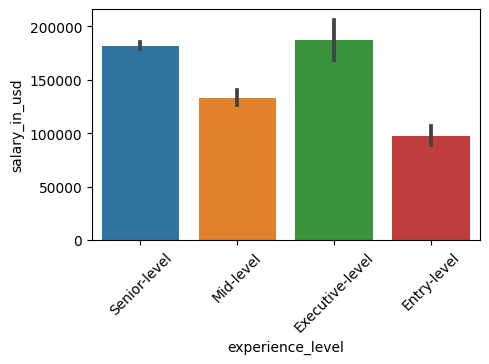

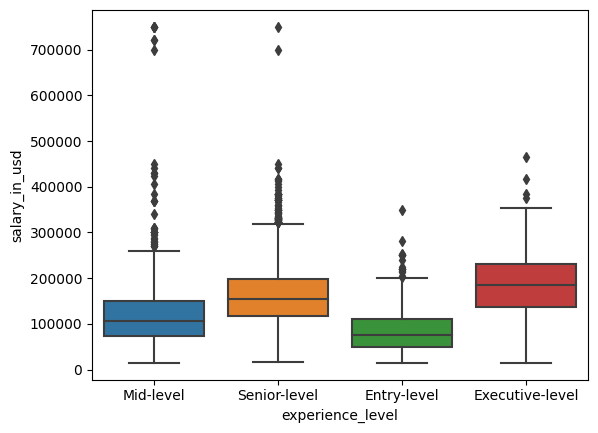

In [73]:
plt.figure( figsize = (5,3))

sns.barplot(x = major_job_titles_df2['experience_level'], y = major_job_titles_df2['salary_in_usd'])
plt.xticks(rotation=45)

plt.show()
sns.boxplot(x='experience_level', y='salary_in_usd', data=df2)
plt.show()

In [74]:
# Source: top = variation between, bottom = variation within
# SS: sum of squared deviations of group means from the overall mean.  top= SSB, bottom = SSW
# MS: SS/DF = MS, top=MSB, bottom= MSW
# F:F-Test, F statistics, MSB/MSW: null hypothesis (H0) that the means of the groups are equal. A higher F-value suggests that the difference between group means is more significant.
# p-unc; Uncorrected p-value, default at 0.05, H0: no group meean diff, Ha: otherwise
# np2: effect size, partial eta-squared, partial η²,  It represents the proportion of variance explained by the effect (in this case, the grouping variable) while taking into account the influence of 
    # other factors or covariates in the model.  typically range between 0 and 1, 
    # Small effect: η² around 0.01
    # Medium effect: η² around 0.06
    # Large effect: η² around 0.14
# 'eps': Greenhouse-Geisser epsilon factor (= index of sphericity)
# 'p-GG-corr': Greenhouse-Geisser corrected p-value
# 'W-spher': Sphericity test statistic
# 'p-spher': p-value of the sphericity test
# 'sphericity': sphericity of the data (boolean)
aov = pg.anova(data=major_job_titles_df, dv='salary_in_usd', between='job_title', detailed=True)
print(aov)

Counter(major_job_titles_df['job_title'])

      Source            SS    DF            MS          F          p-unc   
0  job_title  3.977610e+12    23  1.729396e+11  40.582783  2.241978e-168  \
1     Within  2.471187e+13  5799  4.261403e+09        NaN            NaN   

        np2  
0  0.138643  
1       NaN  


Counter({'Data Engineer': 1307,
         'Data Scientist': 1243,
         'Data Analyst': 910,
         'Machine Learning Engineer': 629,
         'Analytics Engineer': 246,
         'Research Scientist': 206,
         'Data Architect': 176,
         'Research Engineer': 136,
         'ML Engineer': 113,
         'Applied Scientist': 97,
         'Data Science Manager': 86,
         'Business Intelligence Analyst': 82,
         'Machine Learning Scientist': 73,
         'Business Intelligence Engineer': 69,
         'Data Manager': 63,
         'Research Analyst': 60,
         'Data Science': 56,
         'AI Engineer': 48,
         'Data Specialist': 47,
         'Data Science Consultant': 42,
         'BI Developer': 41,
         'Director of Data Science': 31,
         'Data Analytics Manager': 31,
         'Machine Learning Infrastructure Engineer': 31})

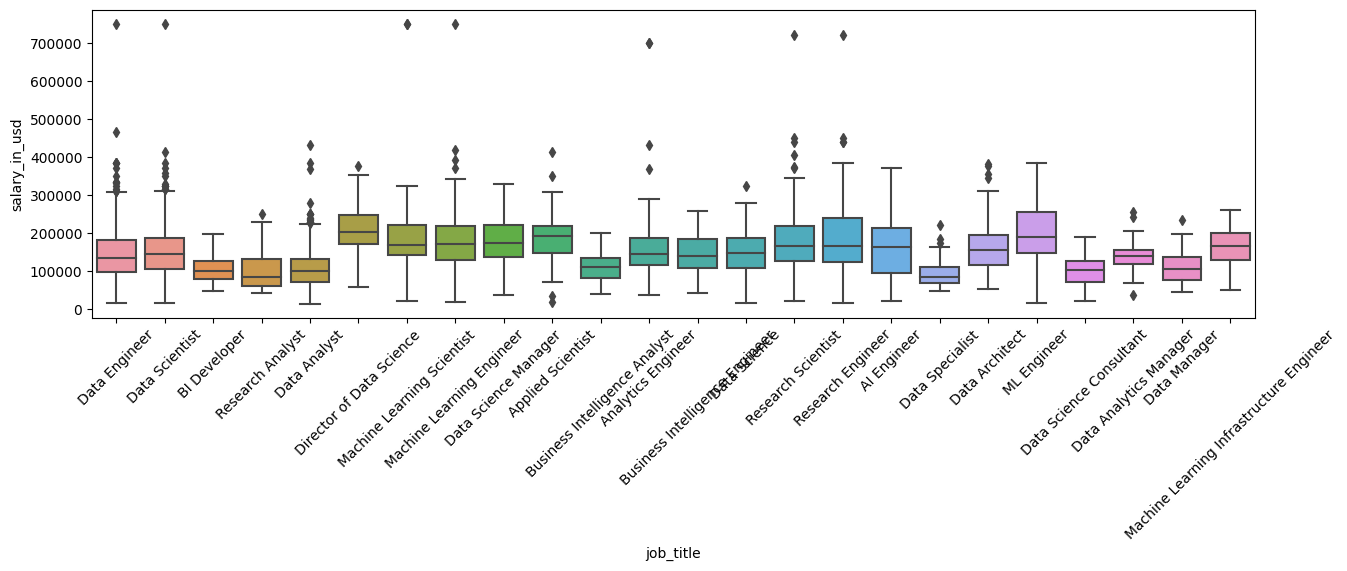

In [75]:
plt.figure(figsize=(15, 4)) 

sns.boxplot(x='job_title', y='salary_in_usd', data=major_job_titles_df)
plt.xticks(rotation=45)

plt.show()

In [76]:
# homogeneity normality and independent assumptions
aov = pg.anova(data=major_job_titles_df2, dv='salary_in_usd', between='job_title', detailed=True)
print(aov)

Counter(major_job_titles_df2['job_title'])

      Source            SS    DF            MS         F         p-unc   
0  job_title  7.064558e+11     6  1.177426e+11  23.26564  7.803177e-27  \
1     Within  1.206999e+13  2385  5.060794e+09       NaN           NaN   

        np2  
0  0.055294  
1       NaN  


Counter({'Data Scientist': 1243,
         'Machine Learning Engineer': 629,
         'Research Scientist': 206,
         'ML Engineer': 113,
         'Applied Scientist': 97,
         'Machine Learning Scientist': 73,
         'Machine Learning Infrastructure Engineer': 31})

In [77]:
# summary statistics of 1numerical + 1categorical
result = major_job_titles_df2.groupby('job_title')['salary_in_usd'].describe().sort_values(by='mean', ascending=False)
median_salary = df2.groupby('job_title')['salary_in_usd'].median()
median_salary
# Add median statistics to the sorted result DataFrame
result['median'] = median_salary
result

,count,mean,std,min,25%,50%,75%,max,median
job_title,,,,,,,,,
ML Engineer,113.0,198223.256637,79227.346718,15966.0,148000.0,189400.0,256000.0,385000.0,189400.0
Machine Learning Scientist,73.0,193710.438356,110030.732781,22800.0,142200.0,170000.0,222000.0,750000.0,170000.0
Applied Scientist,97.0,190687.711340,57793.195716,20000.0,149300.0,191475.0,220000.0,414000.0,191475.0
Research Scientist,206.0,180082.029126,82649.704531,23000.0,127975.0,165250.0,220000.0,720000.0,165250.0
Machine Learning Engineer,629.0,177226.448331,72770.418335,20000.0,129300.0,170730.0,220000.0,750000.0,170730.0
Machine Learning Infrastructure Engineer,31.0,162711.096774,54866.030007,50180.0,129850.0,165400.0,200460.0,260000.0,165400.0
Data Scientist,1243.0,149036.650845,65683.503427,16000.0,105000.0,144500.0,187457.5,750000.0,144500.0


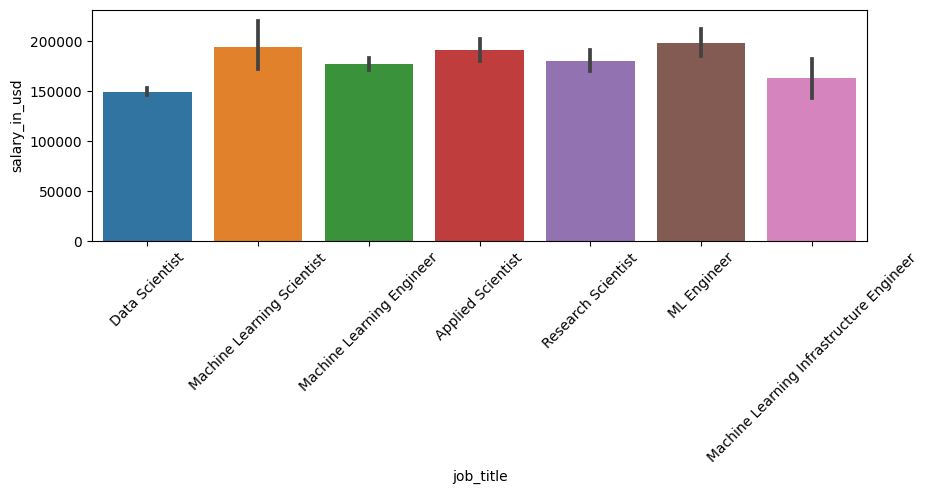

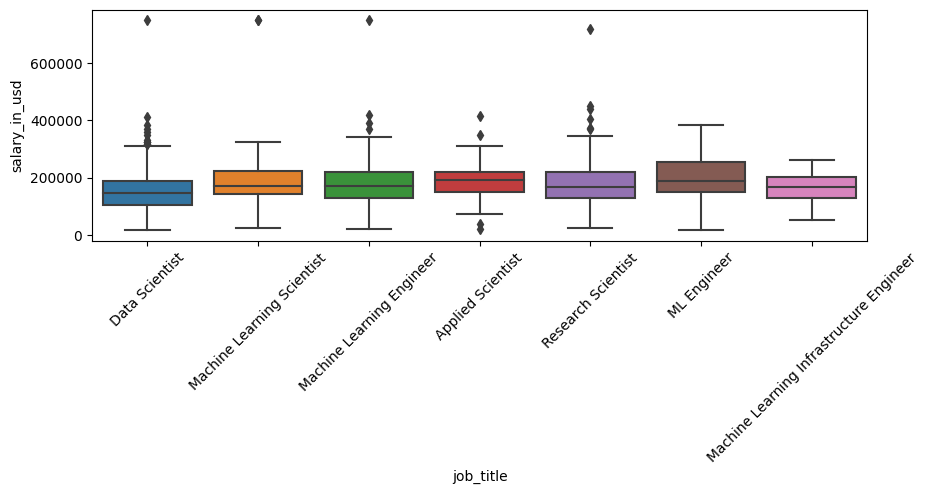

In [78]:
plt.figure( figsize = (10,3))

sns.barplot(x = major_job_titles_df2['job_title'], y = major_job_titles_df2['salary_in_usd'])
plt.xticks(rotation=45)

plt.show()

plt.figure( figsize = (10,3))

sns.boxplot(x='job_title', y='salary_in_usd', data=major_job_titles_df2)
plt.xticks(rotation=45)
# plt.yscale('log')

plt.show()


# Post-Hoc ANOVA Test: Find out which Ones are of Significant Difference

# General Pairwise T-Test

In [111]:
# homogeneity normality and independent assumptions

# pairwise ttest - This function is more general and can perform various pairwise comparisons, including t-tests,
# Wilcoxon signed-rank tests, and Mann-Whitney U tests, depending on the input data and parameters.
# pairwise t-test to check which ones are stat significance after a significant anova
# pair : same subjects are measured under different conditions (true), False otherwise
# Parametric:Parametric tests assume that the data come from a normally distributed population with equal variances.
# 'p-unc' column: Contains the uncorrected p-value for the T-test. other choices:  (none, bonf , sidak, holm, fdr_bh, fdr_by): Bonferroni, Sidak, step-down method using Bonferroni, Benjamini/Hochberg FDR, Benjamini/Yekutieli FDR
# Hedges';  effect size estimate for the comparison. g, a measure of the standardized mean difference between the groups. Positive values indicate that the first group has higher means,
# Hedges: while negative values indicate that the second group has higher means
# BF10; Bayes Factor quantifies the evidence for the alternative hypothesis relative to the null hypothesis. Values greater than 1 indicate evidence for
# BF10; the alternative hypothesis, while values less than 1 indicate evidence for the null hypothesis..
# alternative: the test considers the possibility of differences in both directions. (two-sided, greater, less)

results = pg.pairwise_tests(data=major_job_titles_df2, dv='salary_in_usd', between='job_title', 
                            parametric = True,
                            # alternative = 'two-sided',
                            # padjust = 'fdr_bh'
                           )
stat_significant_threshold = 0.05
results['BF10'] = results['BF10'].astype(float)
# create new col for easy stat understanding
results['stat_significant'] = np.where(results['p-unc']<= stat_significant_threshold,1,0) 
results['test_favor'] = np.where(results['BF10']<= 1,'H0','H1') 
results['mean_higher'] = np.where(results['hedges'] > 0 ,'group_A','group_B') 

results[results['stat_significant'] == 1].sort_values(by = 'stat_significant', ascending = False)
# results.sort_values(by = 'stat_significant', ascending = False)


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges,stat_significant,test_favor,mean_higher
0,job_title,Applied Scientist,Data Scientist,False,True,6.765206,116.237697,two-sided,5.677613e-10,5.961493e-09,fdr_bh,3.588000e+08,0.638960,1,H1,group_A
2,job_title,Applied Scientist,Machine Learning Engineer,False,True,2.056353,147.336302,two-sided,4.151293e-02,9.686351e-02,fdr_bh,9.110000e-01,0.189488,1,H0,group_A
3,job_title,Applied Scientist,Machine Learning Infrastructure Engineer,False,True,2.439311,52.966813,two-sided,1.809833e-02,4.750810e-02,fdr_bh,2.918000e+00,0.486952,1,H1,group_A
6,job_title,Data Scientist,ML Engineer,False,True,-6.402502,126.389224,two-sided,2.730955e-09,1.911669e-08,fdr_bh,3.721000e+07,-0.734732,1,H1,group_B
7,job_title,Data Scientist,Machine Learning Engineer,False,True,-8.175295,1153.424238,two-sided,7.710703e-16,1.619248e-14,fdr_bh,7.741000e+12,-0.413503,1,H1,group_B
9,job_title,Data Scientist,Machine Learning Scientist,False,True,-3.433227,75.043322,two-sided,9.740145e-04,4.090861e-03,fdr_bh,3.590300e+01,-0.648419,1,H1,group_B
10,job_title,Data Scientist,Research Scientist,False,True,-5.129474,249.709500,two-sided,5.835169e-07,3.063464e-06,fdr_bh,3.029000e+04,-0.454018,1,H1,group_B
11,job_title,ML Engineer,Machine Learning Engineer,False,True,2.625270,147.916406,two-sided,9.567766e-03,2.870330e-02,fdr_bh,3.098000e+00,0.284283,1,H1,group_A
12,job_title,ML Engineer,Machine Learning Infrastructure Engineer,False,True,2.874237,68.164609,two-sided,5.397250e-03,1.889038e-02,fdr_bh,7.929000e+00,0.472597,1,H1,group_A


In [80]:
major_job_titles_df2.columns

Index(['job_title', 'experience_level', 'employment_type', 'work_models',
       'work_year', 'employee_residence', 'salary', 'salary_currency',
       'salary_in_usd', 'company_location', 'company_size'],
      dtype='object')

In [81]:
# homogeneity normality and NONE-independent assumptions (cannot assume independent)
# rm_aov = anova for repeat-measured, none-independent anova /One-way repeated-measures 
# between vs. within arg
# within arg: factor that compute group mean from
# subject: the col contains info which subject were done the repeat measureed from , eg: patientId, etc.
rm_aov = pg.rm_anova(data=major_job_titles_df2, dv='salary_in_usd', within='Disgustingness',  subject='Subject', detailed=True)
rm_aov



In [97]:
# homogeneity normality and NONE-independent assumptions (cannot assume independent)
# none-independent anova / two-way repeated-measures = two factors
aov = pg.rm_anova(dv='DesireToKill', within=['Disgustingness', 'Frighteningness'],
                  subject='Subject', data=df)


0     3.588000e+08
1     2.030000e-01
2     9.110000e-01
3     2.918000e+00
4     1.710000e-01
5     2.970000e-01
6     3.721000e+07
7     7.741000e+12
8     4.480000e-01
9     3.590300e+01
10    3.029000e+04
11    3.098000e+00
12    7.929000e+00
13    1.700000e-01
14    7.510000e-01
15    4.810000e-01
16    2.840000e-01
17    9.800000e-02
18    1.098000e+00
19    5.730000e-01
20    2.300000e-01
Name: BF10, dtype: float64

In [82]:
# homoscedasticity test: levene test
# missing value are not supported, need either pandas.DataFrame.dropna() or pingouin.remove_na() functions.
pg.homoscedasticity(df2, dv="salary_in_usd", group="job_title")
# pg.homoscedasticity(df2, dv="salary_in_usd", group="job_title", center= "mean")
# pg.homoscedasticity(df2, method="bartlett", alpha=.05)




,W,pval,equal_var
levene,2.775019,7.365424e-23,False


# Parametric ANOVA Tests
### Syntax

In [ ]:
# homogeneity normality and independent assumptions
# 1-way anova
pg.anova(dv='Pain threshold', between='Hair color', data=df, detailed=True)
# 2-way anova
pg.anova(dv="Yield", between=["Blend", "Crop"],  data=df)
# 2-way annova with unbalanced design (requires statsmodels)
pg.anova(dv="Scores", between=["Diet", "Exercise"], effsize="n2")
# 3-way anova 
pg.anova(dv='Cholesterol', between=['Sex', 'Risk', 'Drug'],ss_type=3)
# One-way and two-way repeated measures ANOVA, rm = repeat-measured
pg.rm_anova(dv='DesireToKill', within='Disgustingness',
                  subject='Subject', data=df, detailed=True, effsize="np2")

# two-way repeated measures anova, 
pg.rm_anova(dv='DesireToKill', within=['Disgustingness', 'Frighteningness'],
                  subject='Subject', data=df, detailed=True,)

 # the between-subject groups are unbalanced (= unequal sample sizes), a type II ANOVA will be computed.
# when you have both within-subjects and between-subjects factors:# or When you want to assess interaction effects
# When you want to control for subject-specific variability
pg.mixed_anova(dv='Scores', between='Group', within='Time', subject='Subject', data=df)

# none-homogeneity (unequal variance), normality and independent assumptions
pg.welch_anova(dv='Pain threshold', between='Hair color', data=df)


In [84]:
# The pairwise Tukey and pairwise Games-Howell tests are both post-hoc tests used in ANOVA (Analysis of Variance) to determine which specific groups differ significantly 
# from each other after finding a significant omnibus result in the ANOVA
pg.pairwise_tukey(dv='body_mass_g', between='species').round(3)

pg.pairwise_gameshowell(data=df, dv='body_mass_g',
                        between='species').round(3)

# None-Parameric (Multi-Groups) Test

In [85]:
# Kruskal-Wallis H-test: non-parametric test for independent groups statistically differences: (equivalent to parametric using ANOVA)
# (H0): The distributions of all groups are equal.s (H1): At least one of the groups has a different distribution.
kruskal(data=major_job_titles_df2, dv='salary_in_usd', between='job_title')


,Source,ddof1,H,p-unc
Kruskal,job_title,6,138.238659,2.358253e-27


# None-Parametric Pairwise (Paired) T-Test
## test Single target numericals for two groups /pairwise levels

In [86]:
#Wilcoxon test: None-parametric pairwise Paired T-Test
# Wilcoxon signed-rank test tests the null hypothesis that two related paired samples come from the same distribution.
# compare two group levels at a time for every numerical feature of Iris
#the scipy method:
cols = [x for x in df.columns if 'sepal' in x or 'petal' in x]
for i in cols:
    print(i)
    results = stats.wilcoxon(setosa[i], versicolor[i], alternative='two-sided', correction=True)
    print(results)
    
#the pg method:
# 'W-val': W-value
# 'alternative': tail of the test
# 'p-val': p-value
# 'RBC' : matched pairs rank-biserial correlation (effect size)
# 'CLES' : common language effect size
cols = [x for x in df.columns if 'sepal' in x or 'petal' in x]
for i in cols:
    print(i)
    results = pg.wilcoxon(setosa[i], versicolor[i], alternative='two-sided', correction=True)
    print(results)

sepallengthcm
WilcoxonResult(statistic=19.0, pvalue=3.5865480097410166e-09)
sepalwidthcm
WilcoxonResult(statistic=34.0, pvalue=3.1885253041485035e-08)
petallengthcm
WilcoxonResult(statistic=0.0, pvalue=1.7763568394002505e-15)
petalwidthcm
WilcoxonResult(statistic=0.0, pvalue=1.7763568394002505e-15)
sepal_width
WilcoxonResult(statistic=34.0, pvalue=3.1885253041485035e-08)
sepallengthcm
          W-val alternative         p-val      RBC    CLES
Wilcoxon   19.0   two-sided  3.586548e-09 -0.96898  0.0674
sepalwidthcm
          W-val alternative         p-val       RBC    CLES
Wilcoxon   34.0   two-sided  3.188525e-08  0.937095  0.9222
petallengthcm
          W-val alternative         p-val  RBC  CLES
Wilcoxon    0.0   two-sided  1.776357e-15 -1.0   0.0
petalwidthcm
          W-val alternative         p-val  RBC  CLES
Wilcoxon    0.0   two-sided  1.776357e-15 -1.0   0.0
sepal_width
          W-val alternative         p-val       RBC    CLES
Wilcoxon   34.0   two-sided  3.188525e-08  0.93709

/Users/emilyli/eli_py39/lib/python3.9/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Users/emilyli/eli_py39/lib/python3.9/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Users/emilyli/eli_py39/lib/python3.9/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [87]:
# (Wilcoxon signed-rank test); pg.pairwise_tests() w/ Parametric = False is the Wilcoxon test 
results = pg.pairwise_tests(data=df, dv='sepallengthcm', between='species', 
                            parametric = False,
                            # alternative = 'two-sided',
                            padjust = 'bonf'
                           )
results

stat_significant_threshold = 0.05
# # create new col for easy stat understanding
results['stat_significant'] = np.where(results['p-unc']<= stat_significant_threshold,1,0) 
results['mean_higher'] = np.where(results['hedges'] > 0 ,'group_A','group_B') 

# results[results['stat_significant'] == 1].sort_values(by = 'stat_significant', ascending = False)
results.sort_values(by = 'stat_significant', ascending = False)


,Contrast,A,B,Paired,Parametric,U-val,alternative,p-unc,p-corr,p-adjust,hedges,stat_significant,mean_higher
0,species,Iris-setosa,Iris-versicolor,False,False,168.5,two-sided,8.345827e-14,2.503748e-13,bonf,-2.088053,1,group_B
1,species,Iris-setosa,Iris-virginica,False,False,38.5,two-sided,6.396699e-17,1.919010e-16,bonf,-3.053629,1,group_B
2,species,Iris-versicolor,Iris-virginica,False,False,526.0,two-sided,5.869006e-07,1.760702e-06,bonf,-1.117195,1,group_B


# None-Parametric Pairwise (unpaired/independent) T-Test
## test Single target numericals for two groups /pairwise levels

In [88]:
#Mann-Whitney U Test: None-parametric pairwise Unpaired (independen) T-Test
# compare two group levels at a time for every numerical feature of Iris

#the scipy method: 
cols = [x for x in df.columns if 'sepal' in x or 'petal' in x]
for i in cols:
    print(i)
    results = stats.mannwhitneyu(setosa[i], versicolor[i], use_continuity=True, alternative='two-sided')
    print(results)

# the pg method:
# 'U-val': U-value
# 'alternative': tail of the test
# 'p-val': p-value
# 'RBC' : rank-biserial correlation
# 'CLES' : common language effect size
cols = [x for x in df.columns if 'sepal' in x or 'petal' in x]
for i in cols:
    print(i)
    results = pg.mwu(setosa[i], versicolor[i], alternative='two-sided',
                     # method='exact'
                    )
    print(results)
    


sepallengthcm
MannwhitneyuResult(statistic=168.5, pvalue=8.34582714594069e-14)
sepalwidthcm
MannwhitneyuResult(statistic=2305.5, pvalue=2.983442275346375e-13)
petallengthcm
MannwhitneyuResult(statistic=0.0, pvalue=5.634269830542843e-18)
petalwidthcm
MannwhitneyuResult(statistic=0.0, pvalue=2.5081060795249738e-18)
sepal_width
MannwhitneyuResult(statistic=2305.5, pvalue=2.983442275346375e-13)
sepallengthcm
     U-val alternative         p-val     RBC    CLES
MWU  168.5   two-sided  8.345827e-14  0.8652  0.0674
sepalwidthcm
      U-val alternative         p-val     RBC    CLES
MWU  2305.5   two-sided  2.983442e-13 -0.8444  0.9222
petallengthcm
     U-val alternative         p-val  RBC  CLES
MWU    0.0   two-sided  5.634270e-18  1.0   0.0
petalwidthcm
     U-val alternative         p-val  RBC  CLES
MWU    0.0   two-sided  2.508106e-18  1.0   0.0
sepal_width
      U-val alternative         p-val     RBC    CLES
MWU  2305.5   two-sided  2.983442e-13 -0.8444  0.9222


# None-Parametric Pairwise Paired Test (Wilcoxon signed-rank tests)
## test multiple target numericals for every two groups /pairwise levels

In [89]:
# pg.pairwise_tests + parametric = False is the Wilcoxin test
# test every target numericals for every two groups /pairwise levels
test_cols = [x for x in df.columns if 'sepal' in x or 'petal' in x]
all_results = pd.DataFrame()
all_results_list = []

# for i = every numerical col, do for all numerical cols
for i in test_cols:
    # print(i)
    results = pg.pairwise_tests(data=df, dv=i, between='species', 
                            parametric = False,
                            # alternative = 'two-sided',
                            padjust = 'bonf')
    stat_significant_threshold = 0.05
    # # create new col for easy stat understanding
    results['stat_significant'] = np.where(results['p-unc']<= stat_significant_threshold,1,0) 
    results['mean_higher'] = np.where(results['hedges'] > 0 ,'group_A','group_B') 
    
    results['dependent_var'] = np.repeat(i,results.shape[0])
    # results[results['stat_significant'] == 1].sort_values(by = 'stat_significant', ascending = False)
    # results.sort_values(by = 'stat_significant', ascending = False)

    all_results_list.append(results)
    
all_results = pd.concat(all_results_list, ignore_index=True)
all_results.sort_values(by = ['A','B'], ascending = False)

,Contrast,A,B,Paired,Parametric,U-val,alternative,p-unc,p-corr,p-adjust,hedges,stat_significant,mean_higher,dependent_var
2,species,Iris-versicolor,Iris-virginica,False,False,526.0,two-sided,5.869006e-07,1.760702e-06,bonf,-1.117195,1,group_B,sepallengthcm
5,species,Iris-versicolor,Iris-virginica,False,False,841.0,two-sided,4.572142e-03,1.371643e-02,bonf,-0.636233,1,group_B,sepalwidthcm
8,species,Iris-versicolor,Iris-virginica,False,False,44.5,two-sided,9.133545e-17,2.740063e-16,bonf,-2.501415,1,group_B,petallengthcm
11,species,Iris-versicolor,Iris-virginica,False,False,49.0,two-sided,9.698045e-17,2.909414e-16,bonf,-2.902630,1,group_B,petalwidthcm
14,species,Iris-versicolor,Iris-virginica,False,False,841.0,two-sided,4.572142e-03,1.371643e-02,bonf,-0.636233,1,group_B,sepal_width
1,species,Iris-setosa,Iris-virginica,False,False,38.5,two-sided,6.396699e-17,1.919010e-16,bonf,-3.053629,1,group_B,sepallengthcm
4,species,Iris-setosa,Iris-virginica,False,False,2073.5,two-sided,1.180877e-08,3.542630e-08,bonf,1.248226,1,group_A,sepalwidthcm
7,species,Iris-setosa,Iris-virginica,False,False,0.0,two-sided,5.648433e-18,1.694530e-17,bonf,-9.916467,1,group_B,petallengthcm
10,species,Iris-setosa,Iris-virginica,False,False,0.0,two-sided,2.669258e-18,8.007775e-18,bonf,-8.482063,1,group_B,petalwidthcm
13,species,Iris-setosa,Iris-virginica,False,False,2073.5,two-sided,1.180877e-08,3.542630e-08,bonf,1.248226,1,group_A,sepal_width


# None-Parametric Pairwise un-paired /Independent Test (Mann-Whitney tests)
## test multiple target numericals for every two groups /pairwise levels

In [90]:
# break a df into multiple dfs based on the group levels of a categorical col
# test every target numericals for every two groups /pairwise levels

grouped = df.groupby('species')
dfs_list = [group for _, group in grouped]
# dfs_list
test_cols = [x for x in df.columns if 'sepal' in x or 'petal' in x]
results_list = []

for i in range(len(dfs_list) - 1):  # Loop until the second to last DataFrame
    # print(i)
    df1 = dfs_list[i]
    for j in range(i + 1, len(dfs_list)):
        df2 = dfs_list[j]
        
        for k, val_k in enumerate(test_cols):
            
            # iteration_list =[]
            # print(set(df1['species']), set(df2['species']), val_k)
            statistic, p_value = stats.mannwhitneyu(df1[val_k],df2[val_k], alternative='two-sided')
            # results = stats.mannwhitneyu(df1[val_k],df2[val_k], alternative='two-sided')

            # print(results)
            iteration_list = [set(df1['species']),set(df2['species']), val_k, statistic, p_value ]
            results_list.append(iteration_list)

column_names = ['Group_A', 'Group_B', 'dependent_var', 'U Stats', 'P-Value']
results_df = pd.DataFrame(results_list, columns=column_names)
results_df

,Group_A,Group_B,dependent_var,U Stats,P-Value
0,{Iris-setosa},{Iris-versicolor},sepallengthcm,168.5,8.345827e-14
1,{Iris-setosa},{Iris-versicolor},sepalwidthcm,2305.5,2.983442e-13
2,{Iris-setosa},{Iris-versicolor},petallengthcm,0.0,5.634270e-18
3,{Iris-setosa},{Iris-versicolor},petalwidthcm,0.0,2.508106e-18
4,{Iris-setosa},{Iris-versicolor},sepal_width,2305.5,2.983442e-13
5,{Iris-setosa},{Iris-virginica},sepallengthcm,38.5,6.396699e-17
6,{Iris-setosa},{Iris-virginica},sepalwidthcm,2073.5,1.180877e-08
7,{Iris-setosa},{Iris-virginica},petallengthcm,0.0,5.648433e-18
8,{Iris-setosa},{Iris-virginica},petalwidthcm,0.0,2.669258e-18
9,{Iris-setosa},{Iris-virginica},sepal_width,2073.5,1.180877e-08


# MANOVA 

In [91]:
 # manova (Multivariate Analysis of Variance) - used to simultaneously analyze the effects of one or more independent variables (factors) on two or more dependent variables. 
# multi-levels groups independent var + multiple output vars, parametric, MANOVA use of the R syntex
# independent, Homogeneity of Covariance Matrices: , Homogeneity of Variance, LinearityLinearity
# Wilks' Lambda The most commonly used statistic in MANOVA. It ranges from 0 to 1, with values closer to 0 indicating stronger evidence against the null hypothesis.
# Pillai's Trace: Similar to Wilks' Lambda but less sensitive to violations of assumptions.

maov = MANOVA.from_formula('sepallengthcm + sepalwidthcm + \
                            petallengthcm + petalwidthcm  ~ species', data=df)
print(maov.mv_test())

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept         Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0170 4.0000 144.0000 2080.5278 0.0000
         Pillai's trace  0.9830 4.0000 144.0000 2080.5278 0.0000
 Hotelling-Lawley trace 57.7924 4.0000 144.0000 2080.5278 0.0000
    Roy's greatest root 57.7924 4.0000 144.0000 2080.5278 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
        species          Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0235 8.0000 288.0000  198.7110 0.0000
         Pillai's trace  1.1872 8.0000 290.00

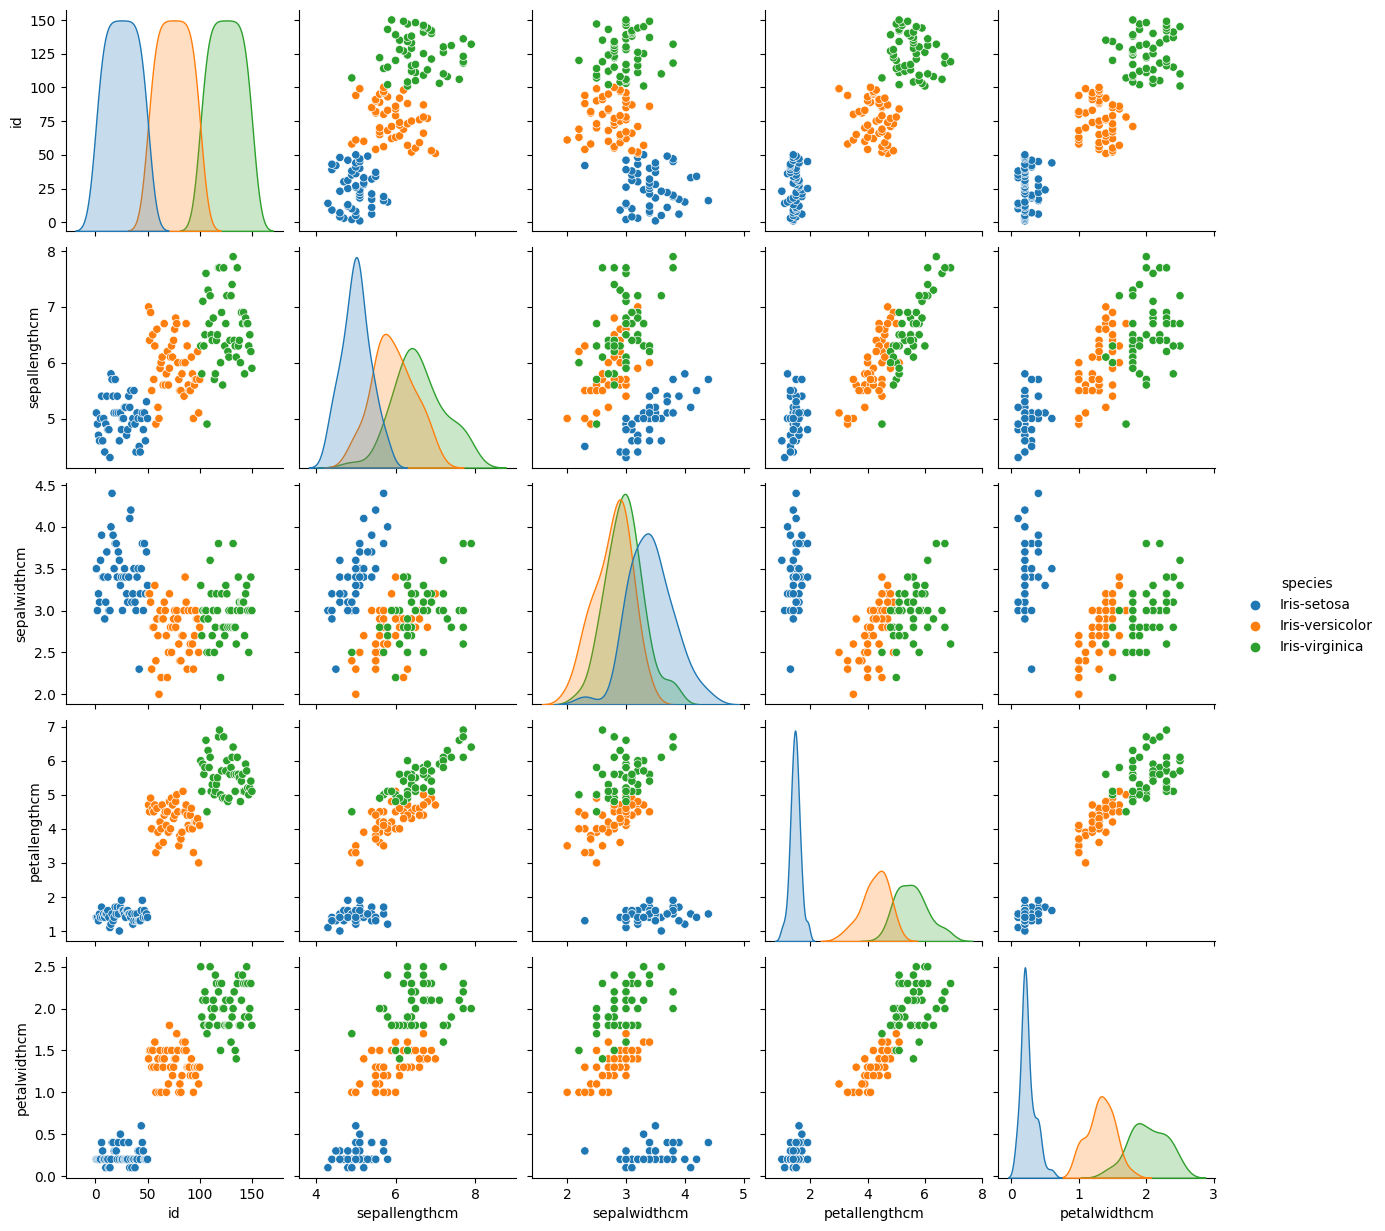

In [77]:
# df = df.iloc[:, :-1]
sns.pairplot(data=df, hue="species")


In [74]:
df.head()

,id,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,species,sepal_width
0,1,5.1,3.5,1.4,0.2,Iris-setosa,3.5
1,2,4.9,3.0,1.4,0.2,Iris-setosa,3.0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,3.2
3,4,4.6,3.1,1.5,0.2,Iris-setosa,3.1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,3.6


In [99]:
df.columns

Index(['id', 'sepallengthcm', 'sepalwidthcm', 'petallengthcm', 'petalwidthcm',
       'species', 'sepal_width'],
      dtype='object')

In [100]:
df2.columns

Index(['job_title', 'experience_level', 'employment_type', 'work_models',
       'work_year', 'employee_residence', 'salary', 'salary_currency',
       'salary_in_usd', 'company_location', 'company_size'],
      dtype='object')

In [101]:
df3.columns

Index(['age_in_5-year_groups', 'type_of_place_of_residence',
       'highest_educational_level', 'wealth_index_combined',
       'births_in_last_five_years', 'age_of_respondent_at_1st_birth',
       'hemoglobin_level_adjusted_for_altitude_and_smoking_(g/dl_-_1_decimal)',
       'anemia_level',
       'have_mosquito_bed_net_for_sleeping_(from_household_questionnaire)',
       'smokes_cigarettes', 'current_marital_status',
       'currently_residing_with_husband/partner', 'when_child_put_to_breast',
       'had_fever_in_last_two_weeks',
       'hemoglobin_level_adjusted_for_altitude_(g/dl_-_1_decimal)',
       'anemia_level_1', 'taking_iron_pills,_sprinkles_or_syrup'],
      dtype='object')

In [105]:
df2.head()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,USD,120000,United States,Medium


In [104]:
df2.drop('salary', axis=1, inplace=True)


In [109]:
os.getcwd()

'/Users/emilyli/workspace/datasets'

# Linear Regression

In [202]:
os.chdir('/Users/emilyli/workspace/datasets/')
# df6 = pd.read_csv('Salary_dataset.csv')
# df6.drop(['Unnamed: 0'], axis =1, inplace = True)

df = pd.read_csv('50_Startups.csv')
def clean_column_names(df):
    # Clean column names
    cleaned_columns = ['_'.join(col.strip().split()).lower() for col in df.columns]
    cleaned_columns = [ i.replace('//','/') for i in cleaned_columns]
    df.columns = cleaned_columns
    return df

df = clean_column_names(df)

df = pd.get_dummies(df, columns=['state'], drop_first=True).astype(int)
df = clean_column_names(df)
X = df.drop('profit', axis =1)
y = df['profit']


In [207]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Add a constant term to the features matrix (intercept)
X_with_intercept = sm.add_constant(X)

# Fit the ordinary least squares (OLS) model
model = sm.OLS(y, X_with_intercept)
results = model.fit()

# Print the summary of the model which includes coefficients, standard errors, p-values, etc. extensive report
print(results.summary())

# sklearn mdl
model = LinearRegression()

# # model like to take in ndarray
# X = df6.YearsExperience.values.reshape(-1, 1)
# y = df6.Salary
# Fit the model to the data
model.fit(X, y)

# Get the slope (coefficient) and intercept
slope = model.coef_
intercept = model.intercept_

# Print coefficients
print("Coefficients:")
print("Slope (m):", slope)
print("Intercept (c):", intercept)

# Make predictions
y_pred = model.predict(X)
y_pred


                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Thu, 14 Mar 2024   Prob (F-statistic):           1.34e-27
Time:                        23:08:32   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5.013e+04   6884.836     

array([192390.34136005, 189070.68994383, 182275.54374908, 173584.54627268,
       172276.63058669, 163472.9936502 , 158098.72177908, 160155.26688083,
       151634.22243038, 154828.85587361, 135664.29023946, 135527.74525176,
       129282.06470131, 127430.83268197, 149693.89441928, 146143.02619282,
       116853.94669624, 130085.18626188, 129149.38500659, 115593.38210467,
       116570.00632588, 117201.05615449, 114832.67456638, 110123.16955402,
       113294.20475576, 102199.57745275, 110764.33556621, 114279.28080476,
       101817.88523823, 101720.48529219,  99628.33460755,  97616.84296381,
        98987.40041792,  98060.37130036,  88974.60654548,  90419.9166136 ,
        75422.27268759,  89576.89566974,  69606.02194714,  83684.51541565,
        74762.4243236 ,  74955.36887274,  70575.21613757,  60099.55122731,
        64584.42007318,  47588.02394236,  56272.51202369,  46468.15794375,
        49122.91802586,  48184.98746797])

In [287]:
predicted_values

array([ 36188.15875227,  38078.15121656,  39968.14368085,  44693.12484158,
        46583.11730587,  53198.09093089,  54143.08716303,  56033.07962732,
        56033.07962732,  60758.06078805,  62648.05325234,  63593.04948449,
        63593.04948449,  64538.04571663,  68318.03064522,  72098.0155738 ,
        73988.00803809,  75878.00050238,  81547.97789525,  82492.9741274 ,
        90052.94398456,  92887.932681  , 100447.90253816, 103282.8912346 ,
       108007.87239533, 110842.86109176, 115567.84225249, 116512.83848464,
       123127.81210966, 125017.80457395])

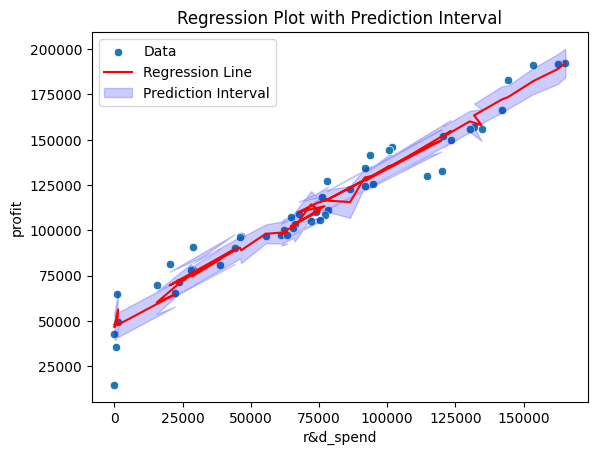

In [214]:
# import statsmodels.api as sm
# import seaborn as sns

# statsmodels methods
# both sklearn & statmodel simple linear regression result the same
# X = df6.YearsExperience.values.reshape(-1, 1)
# y = df6.Salary
# Fit linear regression model
X_with_intercept = sm.add_constant(X)  # Add intercept term
model = sm.OLS(y, X_with_intercept).fit()

# Get prediction intervals
prediction_results = model.get_prediction(X_with_intercept)

# Extract predicted values and prediction intervals
predicted_values = prediction_results.predicted_mean
prediction_intervals = prediction_results.conf_int()

# # Plot data points
sns.scatterplot(x=X['r&d_spend'], y=y, label='Data')

# Plot regression line
plt.plot(X['r&d_spend'], predicted_values, color='red', label='Regression Line')

# Plot prediction intervals
plt.fill_between(X['r&d_spend'], prediction_intervals[:, 0], prediction_intervals[:, 1], color='blue', alpha=0.2, label='Prediction Interval')

# Add labels and legend
# plt.xlabel(df6.columns[0])
# plt.ylabel(df6.columns[1])
plt.title('Regression Plot with Prediction Interval')


plt.legend()

# Show plot
plt.show()


In [279]:
prediction_intervals

array([[ 32267.47384816,  40108.84365638],
       [ 34285.87099586,  41870.43143726],
       [ 36302.19726997,  43634.09009174],
       [ 41332.42933858,  48053.82034458],
       [ 43339.57150077,  49826.66311097],
       [ 50335.93959322,  56060.24226856],
       [ 51331.07782883,  56955.09649723],
       [ 53317.47933961,  58748.67991504],
       [ 53317.47933961,  58748.67991504],
       [ 58257.48432881,  63258.6372473 ],
       [ 60221.4275362 ,  65074.67896849],
       [ 61200.48073256,  65985.61823642],
       [ 61200.48073256,  65985.61823642],
       [ 62177.47443743,  66898.61699584],
       [ 66063.18485432,  70572.87643611],
       [ 69909.64152943,  74286.38961817],
       [ 71816.93948618,  76159.07659   ],
       [ 73713.22545257,  78042.77555219],
       [ 79335.89379758,  83760.06199293],
       [ 80263.63291917,  84722.31533563],
       [ 87600.08371446,  92505.80425467],
       [ 90317.40317159,  95458.46219041],
       [ 97496.02419288, 103399.78088345],
       [100

# Logistics Regression 

In [249]:
os.chdir('/Users/emilyli/workspace/datasets/banking_dataset_classification/')
df4 = pd.read_csv('new_train.csv')
df5 = pd.read_csv('new_test.csv')


In [250]:
# show the categorical feature level distribution;
for col in df4.columns:
    # print(col)
    try:
        if df4[col].dtype == 'object':
            # If the column is categorical (dtype == 'object'), apply Counter() to count occurrences
            counts = Counter(df4[col])
            # print(f"Counts for column '{col}':")
            print(counts)
    except:
        next

Counter({'admin.': 8314, 'blue-collar': 7441, 'technician': 5400, 'services': 3196, 'management': 2345, 'retired': 1366, 'entrepreneur': 1160, 'self-employed': 1099, 'housemaid': 855, 'unemployed': 798, 'student': 711, 'unknown': 265})
Counter({'married': 19953, 'single': 9257, 'divorced': 3675, 'unknown': 65})
Counter({'university.degree': 9736, 'high.school': 7596, 'basic.9y': 4826, 'professional.course': 4192, 'basic.4y': 3322, 'basic.6y': 1865, 'unknown': 1397, 'illiterate': 16})
Counter({'no': 26007, 'unknown': 6940, 'yes': 3})
Counter({'yes': 17254, 'no': 14900, 'unknown': 796})
Counter({'no': 27131, 'yes': 5023, 'unknown': 796})
Counter({'cellular': 20908, 'telephone': 12042})
Counter({'may': 11011, 'jul': 5763, 'aug': 4948, 'jun': 4247, 'nov': 3266, 'apr': 2085, 'oct': 587, 'sep': 464, 'mar': 436, 'dec': 143})
Counter({'thu': 6857, 'mon': 6812, 'wed': 6515, 'tue': 6444, 'fri': 6322})
Counter({'nonexistent': 28416, 'failure': 3429, 'success': 1105})
Counter({'no': 29238, 'yes': 

In [32]:
df4.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [124]:
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent


In [142]:
df4.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,0,0,0,0,0,0,0,0,0,227,4,999,0,0,0
1,37,1,0,1,1,0,0,1,0,0,202,2,999,1,1,0
2,78,2,0,2,1,0,0,0,1,1,1148,1,999,0,0,1
3,36,3,0,1,1,1,0,1,2,1,120,2,999,0,0,0
4,59,2,1,1,1,0,0,0,3,2,368,2,999,0,0,0


In [130]:
df5.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome
0,32,4,0,6,0,0,0,0,3,3,131,5,1
1,37,10,3,6,0,0,0,0,4,3,100,1,1
2,55,5,0,5,1,2,0,0,3,2,131,2,1
3,44,2,1,0,1,0,0,1,4,3,48,2,1
4,28,0,2,3,0,0,0,0,5,0,144,2,1


In [201]:
# show the categorical feature level distribution;
for col in df4.columns:
    print(col)
    try:
        if df4[col].dtype == 'object':
            # If the column is categorical (dtype == 'object'), apply Counter() to count occurrences
            counts = Counter(df4[col])
            uniq_level_cnt = df4[col].nunique()
            # print(f"Counts for column '{col}':")
            print(counts)
            print('uniq_level_cnt:', uniq_level_cnt)
    except:
        next

age
job
Counter({'admin.': 8314, 'blue-collar': 7441, 'technician': 5400, 'services': 3196, 'management': 2345, 'retired': 1366, 'entrepreneur': 1160, 'self-employed': 1099, 'housemaid': 855, 'unemployed': 798, 'student': 711, 'unknown': 265})
uniq_level_cnt: 12
marital
Counter({'married': 19953, 'single': 9257, 'divorced': 3675, 'unknown': 65})
uniq_level_cnt: 4
education
Counter({'university.degree': 9736, 'high.school': 7596, 'basic.9y': 4826, 'professional.course': 4192, 'basic.4y': 3322, 'basic.6y': 1865, 'unknown': 1397, 'illiterate': 16})
uniq_level_cnt: 8
default
Counter({'no': 26007, 'unknown': 6940, 'yes': 3})
uniq_level_cnt: 3
housing
Counter({'yes': 17254, 'no': 14900, 'unknown': 796})
uniq_level_cnt: 3
loan
Counter({'no': 27131, 'yes': 5023, 'unknown': 796})
uniq_level_cnt: 3
contact
Counter({'cellular': 20908, 'telephone': 12042})
uniq_level_cnt: 2
month
Counter({'may': 11011, 'jul': 5763, 'aug': 4948, 'jun': 4247, 'nov': 3266, 'apr': 2085, 'oct': 587, 'sep': 464, 'mar': 

In [202]:
# to check the number of unique levels per categorical feature in test (df5) based on same name of train (df4) and see if the 
# factorizee method is right to convert from str to nbr for df4

# show the categorical feature level distribution;
for col in df4.columns:
    try:
        if df4[col].dtype == 'object':
            print(col)
            # If the column is categorical (dtype == 'object'), apply Counter() to count occurrences
            counts = max(df5[col]) + 1
            # print(f"Counts for column '{col}':")
            print(counts)
    except:
        next

job
12
marital
4
education
8
default
2
housing
3
loan
3
contact
2
month
10
day_of_week
5
poutcome
3
y


In [251]:

#use factorize to convert categorical levels into factor by numbers so can do norrmalize and used for logistics regression 
for col in df4.columns:
    # print(col)
    try:
        if df4[col].dtype == 'object':
            df4[col] = pd.factorize(df4[col])[0]
    except:
        next
        


In [252]:
df4.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,0,0,0,0,0,0,0,0,0,227,4,999,0,0,0
1,37,1,0,1,1,0,0,1,0,0,202,2,999,1,1,0
2,78,2,0,2,1,0,0,0,1,1,1148,1,999,0,0,1
3,36,3,0,1,1,1,0,1,2,1,120,2,999,0,0,0
4,59,2,1,1,1,0,0,0,3,2,368,2,999,0,0,0


In [205]:
Counter(df4['y'])

Counter({0: 29238, 1: 3712})

In [100]:
df4.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,0
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,0
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,0
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,0
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,0


In [112]:
X.shape

(32950, 58)

In [160]:
Counter(df4['y'])

Counter({0: 29238, 1: 3712})

In [3]:
# logistic regression:

# Importing necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import statsmodels.api as sm

from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

# split the df into X (predictors) and y (output)
# drop these features since test (df5) is not included
X = df4.drop(['y', 'pdays', 'previous'], axis=1)  # Features
# X = df4.drop('y', axis=1)  # Features
# df4['y'] = [1 if i =='yes' else 0 for i in df4['y']]
y = df4['y']  # Target variable

# X = pd.get_dummies(X)
# force T/F to 1/0
# X = X.astype(int)

# use one hot-encoding to convert all categorical to numereical for diff group level
# let's not use it if using factorize to convert str level into numerical levels
# X = pd.get_dummies(X)


# splitting data into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Initialize and Train the Logistic Regression Model:
model = LogisticRegression()
# model.fit(X_train, y_train)
model.fit(X_train_scaled, y_train)


# X_test = df5

# y_pred = model.predict(X_test)

y_pred = model.predict(X_test_scaled)


# model evaluation:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
print(coefficients)



NameError: name 'df4' is not defined

In [207]:
# confusion matrix for categorical data, cnt & pct
column_labels = ['y_test', 'y_pred']

confusion_matrix = pd.crosstab(y_pred, y_test,  margins=True)
# confusion_matrix.columns = column_labels

confusion_matrix.columns.name = column_labels[0]  
confusion_matrix.index.name =column_labels[1]

confusion_matrix

# Calculate row and column totals
row_totals = confusion_matrix.iloc[:-1, -1]
column_totals = confusion_matrix.iloc[-1, :-1]

# # Calculate percentages
confusion_matrix_percent = (confusion_matrix.div(confusion_matrix.iloc[-1, -1], axis=1) * 100).round(2)

confusion_matrix_combined = pd.concat([confusion_matrix, confusion_matrix_percent], keys=['Counts', 'Percentages'])
confusion_matrix_combined


y_test                    0       1      All
            y_pred                          
Counts      0       5652.00  577.00  6229.00
            1        146.00  215.00   361.00
            All     5798.00  792.00  6590.00
Percentages 0         85.77    8.76    94.52
            1          2.22    3.26     5.48
            All       87.98   12.02   100.00

In [211]:
X_train[:10]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome
26465,30,6,0,4,1,1,1,0,5,2,147,1,0
1387,48,5,1,3,1,2,2,0,7,1,124,1,1
22628,37,0,2,4,1,1,1,0,2,0,161,1,0
8336,39,3,2,3,1,0,0,1,3,1,202,1,0
19898,52,7,1,1,1,1,0,1,2,3,258,3,0
2375,32,7,0,0,1,1,1,1,3,2,408,2,0
11358,36,8,0,1,1,0,0,0,5,4,148,1,1
5440,72,3,0,1,0,0,1,0,6,2,143,1,2
1133,32,3,0,3,1,1,0,0,1,4,434,2,0
9328,24,6,2,4,1,0,0,1,2,3,410,1,0


In [254]:
X_train.shape

(26360, 13)

## Logistic Regression Model X (onehot + normalized)

In [255]:

# splitting data into train & test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Standardize features
scaler = StandardScaler()
#noramlized X features
# become ndarray not df after transform
X_train_scaled = scaler.fit_transform(X_train)

# Add a constant to the independent variables
X_train_scaled = sm.add_constant(X_train_scaled)

# Fit logistic regression model
# logit_model: model objeect
logit_model = sm.Logit(y_train, X_train_scaled)
result = logit_model.fit()

original_column_names = X_train.columns


# Print summary of the model
print(result.summary())

# Match the coefficients to the original variable names
coefficients = result.params[1:]  # Exclude the intercept

bcoef_vars = result.bse.index[1:]
for i, coef in enumerate(coefficients):
    # print(f"{original_column_names[i]}: {coef}")
    
    print(f"{original_column_names[i]}: {bcoef_vars[i]} {coef:.{5}f}")

   
# Access standard errors and p-values of coefficients
print("\nStandard errors of coefficients:")
print(result.bse)

print("\nP-values of coefficients:")
print(result.pvalues)


Optimization terminated successfully.
         Current function value: 0.242632
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                26360
Model:                          Logit   Df Residuals:                    26346
Method:                           MLE   Df Model:                           13
Date:                Fri, 01 Mar 2024   Pseudo R-squ.:                  0.3030
Time:                        00:00:39   Log-Likelihood:                -6395.8
converged:                       True   LL-Null:                       -9176.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.8193      0.032    -88.138      0.000      -2.882      -2.757
x1             0.1676      0.

## adding more basic statistical models: knn, decision tree, random forrest, naive bayes, svn, 
## kmean, clustering, association rules

In [55]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA




In [197]:
os.chdir('/Users/emilyli/workspace/datasets/')
df7 = pd.read_csv('customer_segmentation.csv')

In [190]:
# show the categorical feature level distribution;
for col in df7.columns:
    try:
        if df7[col].dtype == 'object' and col != 'Dt_Customer':
            # print(col)
        # If the column is categorical (dtype == 'object'), apply Counter() to count occurrences
            counts = Counter(df7[col])
            print(counts)
    except:
        next

Counter({'Graduation': 1127, 'PhD': 486, 'Master': 370, '2n Cycle': 203, 'Basic': 54})
Counter({'Married': 864, 'Together': 580, 'Single': 480, 'Divorced': 232, 'Widow': 77, 'Alone': 3, 'Absurd': 2, 'YOLO': 2})


In [191]:
# X = pd.get_dummies(X)
# df7[['Education', 'Marital_Status',  'Dt_Customer']].nunique()

In [198]:
# data preprocessing steps:
##################################################################
# use one-hot encoder/dummy to convert categoricals, bool might not need to convert to int for kmean model, depend on how modeling reacts
# do dummy for few categorical w/ few levels
df7 = pd.get_dummies(df7, columns = ['Education', 'Marital_Status'])

# date either drop or convert into factor from categorical to numerical since many level don't want highly colinear df, date might have seasonal patttern w/ purchase
# df7.drop(columns = ['Dt_Customer'], inplace = True) 
# Convert categorical data to numerical using factorize
# -: show the index of which coordinate w/ the numbers
df7['Dt_Customer'], _ = pd.factorize(df7['Dt_Customer'])


# Set random seed
np.random.seed(123)
# df7 = df7.select_dtypes(include='number')
##################################################################
#imputation
# to replace nan in num by random sampling of its own column
# Define a function for random sampling imputation
def random_sampling_imputation(series):
    # Get non-missing values
    non_missing = series.dropna()
    # Generate random indices
    rand_index = np.random.choice(non_missing.index, size=series.isnull().sum(), replace=True)
    # Replace missing values with randomly sampled index's values of same col
    # print(rand_index)
    series.iloc[series.isnull()] = non_missing[rand_index].values
    return series

df7['Income'] = random_sampling_imputation(df7['Income'])


/var/folders/2r/5hbyh8qj3kz1zp9byqns38rh0000gn/T/ipykernel_2002/2286550952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series.iloc[series.isnull()] = non_missing[rand_index].values


In [54]:
df7.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52292.115179,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25160.702324,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35335.500000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51400.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68634.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


# Clustering Using KMean

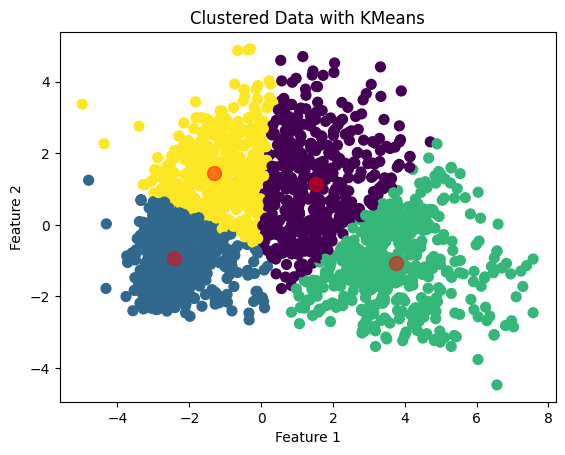

Inertia: 4306.906064237461
Silhouette Score: 0.40510854774250543
Davies-Bouldin Index: 0.8941384629372422
Calinski-Harabasz Index: 2839.547245873298


In [132]:

########################################################
# Z norm transform 
scaler = StandardScaler()
# z score normalization
df7_scaled = scaler.fit_transform(df7)

# this step use to visualize scaled distribution
check_df7_scaled = pd.DataFrame(df7_scaled, columns=df7.columns)
########################################################

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the data
df7_mmscaled = scaler.fit_transform(df7)
check_df7_mmscaled = pd.DataFrame(df7_mmscaled, columns=df7.columns)

########################################################

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
# pca.fit_transform() does fit & transform original input, each row is the obs, eacch col correspond to each PC, result can be viz in reduce space
df7_pca = pca.fit_transform(check_df7_scaled)
# df7_pca = pca.fit_transform(check_df7_mmscaled)

n_clusters = 4

# Initializing and fitting KMeans clustering model
kmeans = KMeans(n_clusters=n_clusters, n_init=10)
kmeans.fit(df7_pca)

# kmeans.fit(df7_scaled)


# Getting cluster centers and labels
centroids = kmeans.cluster_centers_
cluster_labels = kmeans.labels_


# Add cluster labels to the DataFrame
df7['Cluster'] = cluster_labels


# Visualizing clusters and cluster centers
plt.scatter(df7_pca[:, 0], df7_pca[:, 1], c=cluster_labels, s=50, cmap='viridis')
# plt.scatter(df7_scaled[:, 0], df7_scaled[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clustered Data with KMeans')
plt.show()

# Evaluate clustering performance
inertia = kmeans.inertia_
silhouette_score = metrics.silhouette_score(df7_pca, cluster_labels)
davies_bouldin_index = metrics.davies_bouldin_score(df7_pca, cluster_labels)
calinski_harabasz_index = metrics.calinski_harabasz_score(df7_pca, cluster_labels)

print("Inertia:", inertia)
print("Silhouette Score:", silhouette_score)
print("Davies-Bouldin Index:", davies_bouldin_index)
print("Calinski-Harabasz Index:", calinski_harabasz_index)

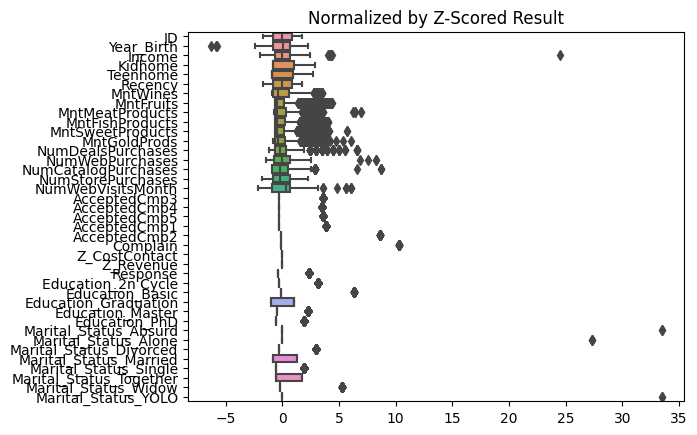

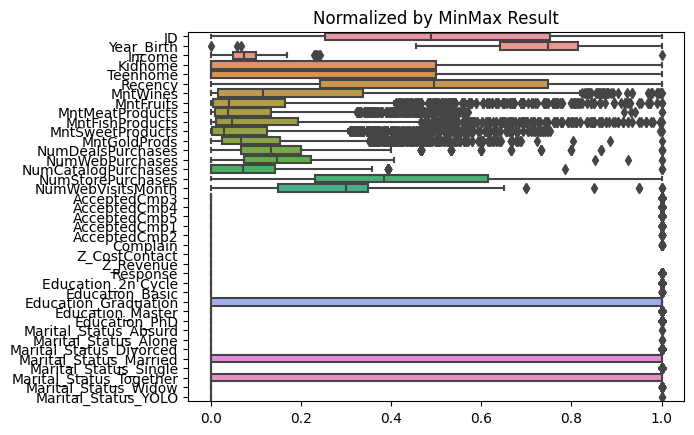

In [74]:
# show new distribution of each scaled col
# scaled by Z-scored
sns.boxplot(data=check_df7_scaled, orient='h')  # 'orient' parameter to make horizontal boxplots
plt.title('Normalized by Z-Scored Result')
plt.show()


# scaled by MinMax
sns.boxplot(data=check_df7_mmscaled, orient='h')  # 'orient' parameter to make horizontal boxplots
plt.title('Normalized by MinMax Result')
plt.show()


## simulation to see what cluster nbr best described the dataset


In [107]:
# simulation to see what cluster nbr best described the dataset
# initialize nbr of possible cluster nbr
clusters_nbr_list = range(2,21)
clusters_nbr_list

# inertia_list = []
# silhouette_score_list = []
# davies_bouldin_index_list = []
# calinski_harabasz_index_list = []
iner_lst = []
silhouette_lst = []
db_idx_lst = []
ch_idx_lst = []


for clus_nbr in clusters_nbr_list:
    
    # print('nbr clusters:', clus_nbr)
    # Initializing and fitting KMeans clustering model
    kmeans = KMeans(n_clusters=clus_nbr, n_init=10)
    kmeans.fit(df7_pca)
    # kmeans.fit(df7_scaled)
    # Getting cluster centers and labels
    centroids = kmeans.cluster_centers_
    cluster_labels = kmeans.labels_

    # Evaluate clustering performance
    inertia = kmeans.inertia_
    silhouette_score = metrics.silhouette_score(df7_pca, cluster_labels)
    davies_bouldin_index = metrics.davies_bouldin_score(df7_pca, cluster_labels)
    calinski_harabasz_index = metrics.calinski_harabasz_score(df7_pca, cluster_labels)
    
    iner_lst.append(inertia)
    silhouette_lst.append(silhouette_score)
    db_idx_lst.append(davies_bouldin_index)
    ch_idx_lst.append(calinski_harabasz_index)

    
kmean_eval = pd.DataFrame({
                'nbr_clusters': clusters_nbr_list,
                'inertia': iner_lst,
                'silhouette_score': silhouette_lst,
                'davies_bouldin_index_idx': db_idx_lst,
                'calinski_harabasz_idx': ch_idx_lst
                })

kmean_eval

,nbr_clusters,inertia,silhouette_score,davies_bouldin_index_idx,calinski_harabasz_idx
0,2,8260.302127,0.517563,0.752313,3073.976403
1,3,4901.242454,0.482957,0.745342,3355.827812
2,4,3870.485131,0.411716,0.838190,3030.189736
3,5,3153.421388,0.376872,0.917545,2915.246241
4,6,2724.199006,0.380779,0.878712,2768.904683
5,7,2346.983790,0.377636,0.878412,2737.035255
6,8,2060.925963,0.383959,0.875871,2714.606498
7,9,1823.641778,0.377550,0.843946,2719.364639
8,10,1661.377480,0.372155,0.841847,2676.280483
9,11,1508.325351,0.353834,0.838496,2674.583472


In [44]:
Counter(kmean_eval_long.Variable)

Counter({'inertia': 19,
         'silhouette_score': 19,
         'davies_bouldin_index_idx': 19,
         'calinski_harabasz_idx': 19})

# kmean on Data Being Z-score Normalized & Dimensionally Reduced
### Simulation perform to get kmean clustering eval using diff df including: raw df, df w/ scaled alone, df w/ pca alone, all show that 
### the df w/ scaled & pca together show the result, cluster comparison & data viz better
### during norm step: Z-scored or MinMax equally good, or MinMax maybe better

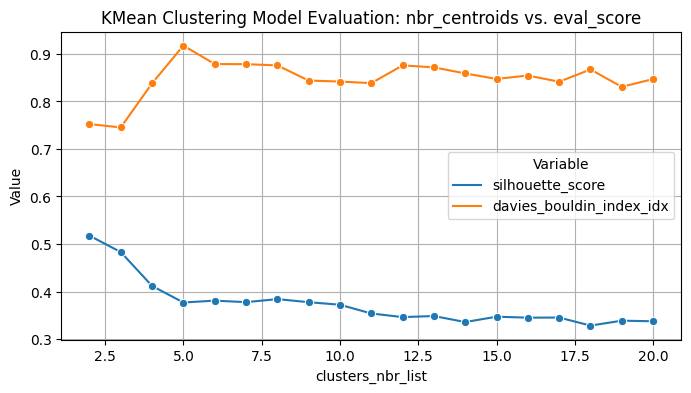

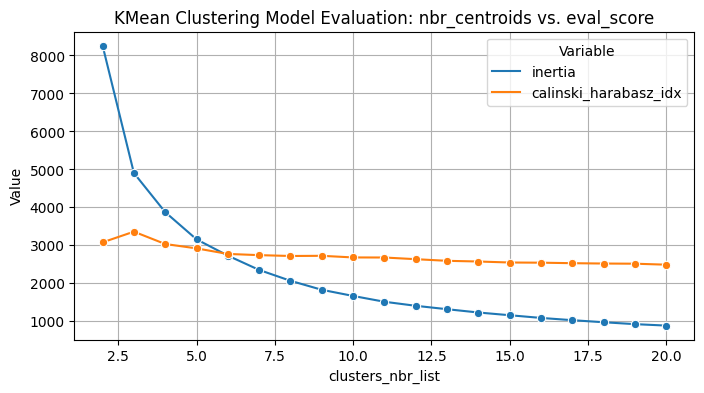

In [108]:
# Reshape DataFrame to long format
kmean_eval_long = pd.melt(kmean_eval, id_vars=['nbr_clusters'], var_name='Variable', value_name='Value')

# inertia: Lower inertia values indicate better clustering.
# Silhouette: ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
#  Davies-Bouldin index: Lower values indicate better clustering.
# Calinski-Harabasz index is the ratio of the between-cluster dispersion mean and the within-cluster dispersion mean. Higher values indicate better clustering.
show_kmean_eval = kmean_eval_long[kmean_eval_long.Variable.isin(['silhouette_score', 'davies_bouldin_index_idx'])]

# make diff plot since the 4 sets of evaluation metrics are at diff scales
# Create line plot using Seaborn
plt.figure(figsize=(8, 4))
sns.lineplot(x='nbr_clusters', y='Value', hue='Variable', data=show_kmean_eval, marker='o',)
plt.title('KMean Clustering Model Evaluation: nbr_centroids vs. eval_score')
plt.xlabel('clusters_nbr_list')
plt.ylabel('Value')
plt.grid(True)
plt.show()

show_kmean_eval = kmean_eval_long[~kmean_eval_long.Variable.isin(['silhouette_score', 'davies_bouldin_index_idx'])]

plt.figure(figsize=(8, 4))
sns.lineplot(x='nbr_clusters', y='Value', hue='Variable', data=show_kmean_eval, marker='o',)
plt.title('KMean Clustering Model Evaluation: nbr_centroids vs. eval_score')
plt.xlabel('clusters_nbr_list')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [109]:
# simulation to see what cluster nbr best described the dataset
# initialize nbr of possible cluster nbr
clusters_nbr_list = range(2,21)
clusters_nbr_list

########################################################

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the data
df7_mmscaled = scaler.fit_transform(df7)
check_df7_mmscaled = pd.DataFrame(df7_mmscaled, columns=df7.columns)

########################################################

pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
df7_pca = pca.fit_transform(df7_mmscaled)

# inertia_list = []
# silhouette_score_list = []
# davies_bouldin_index_list = []
# calinski_harabasz_index_list = []
iner_lst = []
silhouette_lst = []
db_idx_lst = []
ch_idx_lst = []


for clus_nbr in clusters_nbr_list:
    
    # print('nbr clusters:', clus_nbr)
    # Initializing and fitting KMeans clustering model
    kmeans = KMeans(n_clusters=clus_nbr, n_init=10)
    kmeans.fit(df7_pca)
    # kmeans.fit(df7_scaled)
    # Getting cluster centers and labels
    centroids = kmeans.cluster_centers_
    cluster_labels = kmeans.labels_

    # Evaluate clustering performance
    inertia = kmeans.inertia_
    silhouette_score = metrics.silhouette_score(df7_pca, cluster_labels)
    davies_bouldin_index = metrics.davies_bouldin_score(df7_pca, cluster_labels)
    calinski_harabasz_index = metrics.calinski_harabasz_score(df7_pca, cluster_labels)
    
    iner_lst.append(inertia)
    silhouette_lst.append(silhouette_score)
    db_idx_lst.append(davies_bouldin_index)
    ch_idx_lst.append(calinski_harabasz_index)

    
kmean_eval = pd.DataFrame({
                'nbr_clusters': clusters_nbr_list,
                'inertia': iner_lst,
                'silhouette_score': silhouette_lst,
                'davies_bouldin_index_idx': db_idx_lst,
                'calinski_harabasz_idx': ch_idx_lst
                })

kmean_eval

,nbr_clusters,inertia,silhouette_score,davies_bouldin_index_idx,calinski_harabasz_idx
0,2,766.444828,0.519272,0.967610,2161.086746
1,3,363.850313,0.645399,0.616610,3512.732420
2,4,78.238414,0.798860,0.302397,13606.713668
3,5,61.276100,0.706129,0.602878,13178.815087
4,6,44.579764,0.666306,0.601864,14652.620081
5,7,33.578895,0.685683,0.539718,16325.447137
6,8,23.638230,0.666823,0.543473,20003.303511
7,9,18.451388,0.682896,0.524231,22491.170015
8,10,14.151431,0.703844,0.490488,26130.433830
9,11,11.961916,0.715032,0.458287,27850.348836


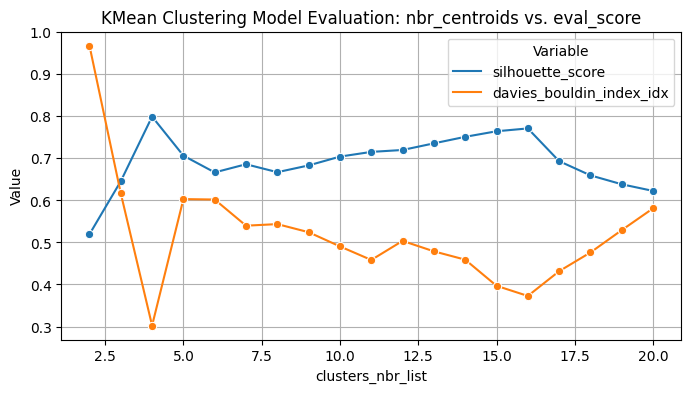

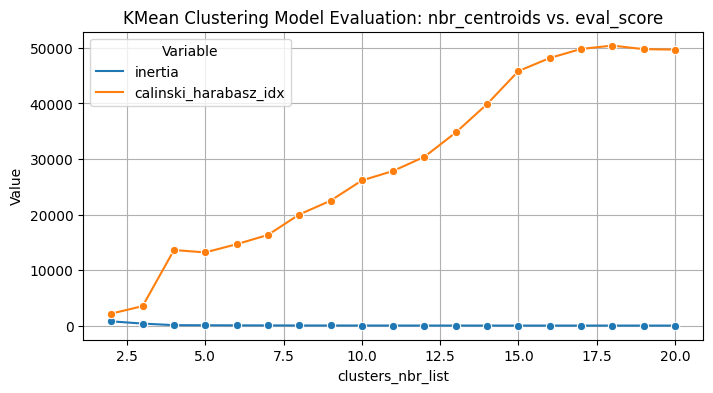

In [110]:
# Reshape DataFrame to long format
kmean_eval_long = pd.melt(kmean_eval, id_vars=['nbr_clusters'], var_name='Variable', value_name='Value')

# inertia: Lower inertia values indicate better clustering.
# Silhouette: ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
#  Davies-Bouldin index: Lower values indicate better clustering.
# Calinski-Harabasz index is the ratio of the between-cluster dispersion mean and the within-cluster dispersion mean. Higher values indicate better clustering.
show_kmean_eval = kmean_eval_long[kmean_eval_long.Variable.isin(['silhouette_score', 'davies_bouldin_index_idx'])]

# make diff plot since the 4 sets of evaluation metrics are at diff scales
# Create line plot using Seaborn
plt.figure(figsize=(8, 4))
sns.lineplot(x='nbr_clusters', y='Value', hue='Variable', data=show_kmean_eval, marker='o',)
plt.title('KMean Clustering Model Evaluation: nbr_centroids vs. eval_score')
plt.xlabel('clusters_nbr_list')
plt.ylabel('Value')
plt.grid(True)
plt.show()

show_kmean_eval = kmean_eval_long[~kmean_eval_long.Variable.isin(['silhouette_score', 'davies_bouldin_index_idx'])]

plt.figure(figsize=(8, 4))
sns.lineplot(x='nbr_clusters', y='Value', hue='Variable', data=show_kmean_eval, marker='o',)
plt.title('KMean Clustering Model Evaluation: nbr_centroids vs. eval_score')
plt.xlabel('clusters_nbr_list')
plt.ylabel('Value')
plt.grid(True)
plt.show()

## Cluster Profile: Understand Feature Statistics Per Cluster

Cluster: 0


,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Cluster
count,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.00000,609.0,609.0,609.000000,609.0
mean,5592.942529,1971.880131,39671.786535,0.706076,0.495895,277.229885,50.729064,117.926108,11.254516,59.929392,14.399015,12.018062,27.717570,2.385878,3.050903,1.116585,4.182266,6.297209,0.062397,0.026273,0.001642,0.004926,0.001642,0.01642,3.0,11.0,0.068966,0.0
std,3330.240809,10.581004,16881.821057,0.535557,0.544469,179.522758,28.587881,191.987192,20.679316,110.068564,23.950883,22.707624,39.670091,1.816553,2.509660,1.858800,2.482428,2.025010,0.242075,0.160076,0.040522,0.070071,0.040522,0.12719,0.0,0.0,0.253604,0.0
min,22.000000,1944.000000,1730.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,3.0,11.0,0.000000,0.0
25%,2656.000000,1965.000000,27469.000000,0.000000,0.000000,126.000000,27.000000,9.000000,1.000000,9.000000,2.000000,1.000000,5.000000,1.000000,1.000000,0.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,3.0,11.0,0.000000,0.0
50%,5517.000000,1973.000000,37774.000000,1.000000,0.000000,256.000000,51.000000,29.000000,4.000000,21.000000,6.000000,4.000000,13.000000,2.000000,2.000000,1.000000,3.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,3.0,11.0,0.000000,0.0
75%,8562.000000,1979.000000,50300.000000,1.000000,1.000000,413.000000,75.000000,144.000000,11.000000,66.000000,16.000000,12.000000,33.000000,3.000000,4.000000,1.000000,5.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,3.0,11.0,0.000000,0.0
max,11191.000000,1995.000000,153924.000000,2.000000,2.000000,661.000000,99.000000,1279.000000,142.000000,1725.000000,182.000000,195.000000,321.000000,15.000000,25.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,3.0,11.0,1.000000,0.0


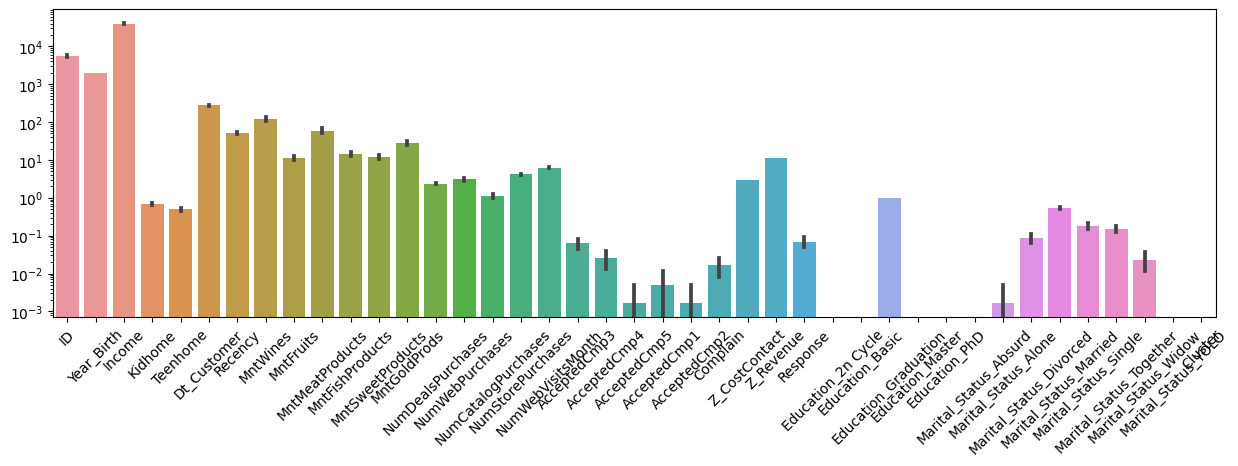

Cluster: 1


,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Cluster
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.0,576.0,576.000000,576.0
mean,5754.838542,1970.562500,41491.402778,0.692708,0.501736,272.961806,49.175347,151.250000,9.236111,55.852431,12.925347,8.708333,23.310764,2.401042,3.000000,1.250000,4.342014,6.137153,0.060764,0.031250,0.003472,0.003472,0.003472,0.010417,3.0,11.0,0.071181,1.0
std,3169.874575,11.645021,19554.560258,0.538289,0.543736,184.312972,29.229505,250.969265,16.314725,121.082440,23.619954,16.616440,34.295072,2.016609,2.306889,2.124802,2.647270,2.091875,0.239104,0.174144,0.058874,0.058874,0.058874,0.101617,0.0,0.0,0.257350,0.0
min,9.000000,1900.000000,4023.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1.0
25%,3207.000000,1963.000000,28034.500000,0.000000,0.000000,112.000000,23.000000,9.000000,0.000000,9.000000,0.000000,0.000000,5.000000,1.000000,1.000000,0.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1.0
50%,5688.000000,1972.000000,38452.000000,1.000000,0.000000,238.500000,49.500000,30.000000,3.000000,19.000000,4.000000,3.000000,12.000000,2.000000,2.000000,1.000000,3.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1.0
75%,8335.750000,1978.000000,54130.250000,1.000000,1.000000,428.250000,75.000000,166.250000,9.000000,59.250000,13.500000,8.250000,26.000000,3.000000,4.000000,2.000000,5.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1.0
max,11187.000000,1996.000000,160803.000000,2.000000,2.000000,659.000000,99.000000,1349.000000,107.000000,1622.000000,168.000000,179.000000,262.000000,15.000000,11.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,1.0


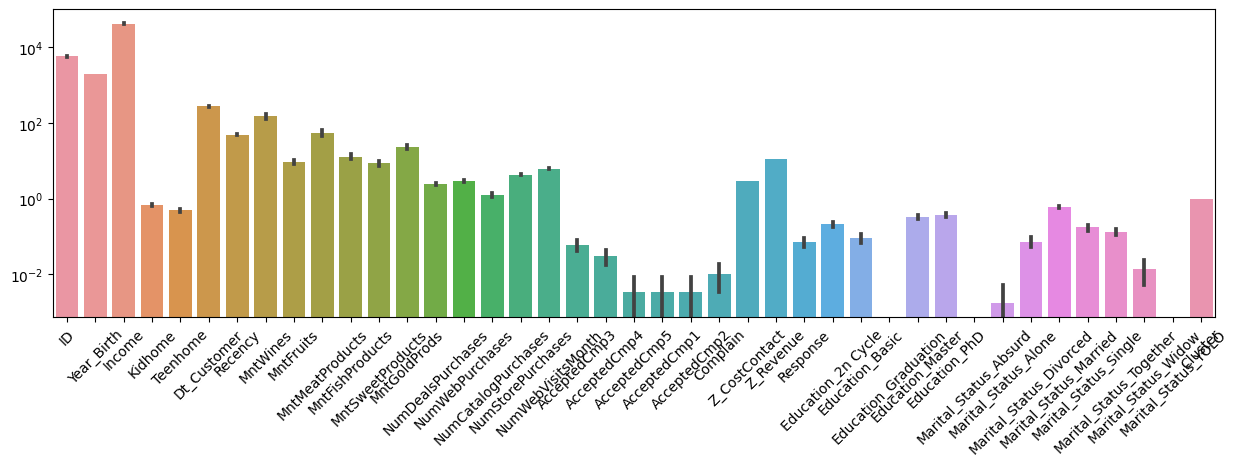

Cluster: 2


,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Cluster
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.0,518.0,518.000000,518.0
mean,5722.571429,1966.996139,68067.650579,0.137066,0.492278,293.760618,49.220077,479.833977,53.723938,320.052124,76.951737,54.115830,78.044402,2.220077,5.388031,4.617761,7.766409,4.100386,0.077220,0.125483,0.164093,0.152510,0.028958,0.007722,3.0,11.0,0.212355,2.0
std,3272.082455,11.980964,30824.403699,0.344249,0.534079,182.497123,29.118211,304.358385,52.513561,253.950480,68.742136,52.243461,61.515924,1.931572,2.545146,2.916078,2.981807,2.330016,0.267198,0.331586,0.370718,0.359862,0.167849,0.087620,0.0,0.0,0.409370,0.0
min,0.000000,1944.000000,19740.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2.0
25%,2947.250000,1957.000000,57186.500000,0.000000,0.000000,141.750000,24.250000,245.000000,12.000000,117.250000,17.000000,12.000000,30.000000,1.000000,4.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2.0
50%,5576.500000,1966.000000,69573.500000,0.000000,0.000000,282.500000,50.000000,433.500000,33.500000,263.500000,55.000000,35.000000,55.500000,1.000000,5.000000,4.000000,7.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2.0
75%,8703.250000,1976.000000,78378.250000,0.000000,1.000000,441.500000,74.000000,656.000000,83.000000,455.000000,122.500000,84.750000,111.000000,3.000000,7.000000,6.000000,10.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2.0
max,11188.000000,1995.000000,666666.000000,1.000000,2.000000,656.000000,99.000000,1492.000000,199.000000,1725.000000,254.000000,263.000000,362.000000,12.000000,27.000000,28.000000,13.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,2.0


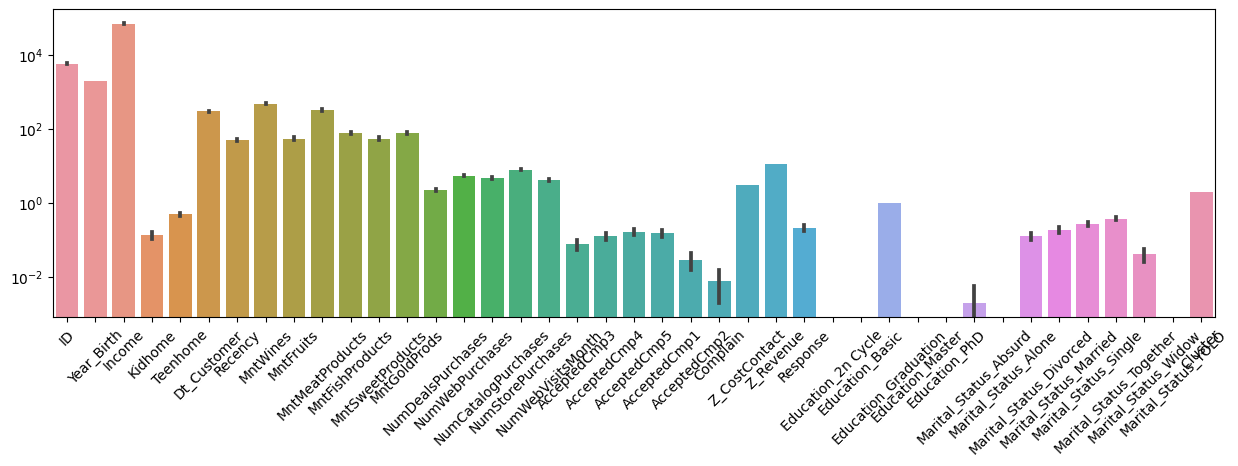

Cluster: 3


,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Cluster
count,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.0,537.0,537.000000,537.0
mean,5290.981378,1965.180633,63064.050279,0.176909,0.536313,292.797020,47.094972,508.985102,35.221601,259.800745,52.108007,37.716946,51.908752,2.275605,5.163873,4.042831,7.260708,4.497207,0.093110,0.126629,0.139665,0.111732,0.022346,0.001862,3.0,11.0,0.262570,3.0
std,3195.192989,12.594233,18150.563713,0.391595,0.555740,181.616944,28.905216,371.690014,42.436841,252.144998,60.710712,46.523244,52.222874,1.966705,2.804440,2.874883,3.151492,2.469306,0.290857,0.332867,0.346962,0.315330,0.147945,0.043153,0.0,0.0,0.440441,0.0
min,13.000000,1893.000000,6835.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,3.0
25%,2574.000000,1956.000000,49912.000000,0.000000,0.000000,136.000000,23.000000,176.000000,3.000000,59.000000,6.000000,2.000000,14.000000,1.000000,3.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,3.0
50%,5092.000000,1965.000000,64831.000000,0.000000,1.000000,278.000000,48.000000,454.000000,19.000000,154.000000,27.000000,19.000000,36.000000,1.000000,5.000000,4.000000,7.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,3.0
75%,7962.000000,1974.000000,77622.000000,0.000000,1.000000,440.000000,72.000000,784.000000,53.000000,417.000000,78.000000,57.000000,68.000000,3.000000,7.000000,6.000000,10.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,1.000000,3.0
max,11176.000000,1995.000000,162397.000000,2.000000,2.000000,662.000000,99.000000,1493.000000,197.000000,1607.000000,259.000000,262.000000,291.000000,15.000000,27.000000,11.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,3.0


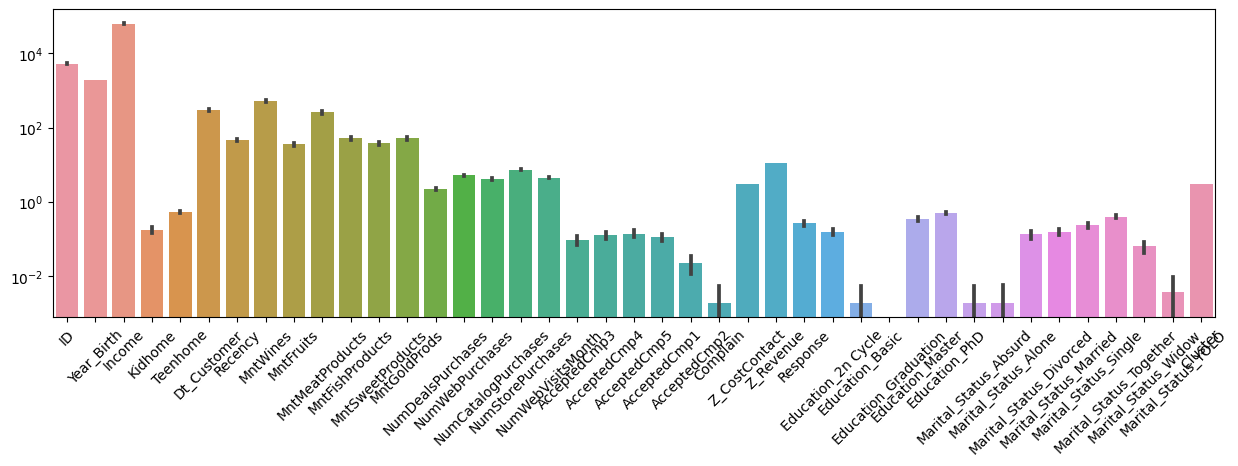

In [131]:
clusters = list(set(df7['Cluster']))
for i in clusters:
    print('Cluster:', i)
    group = df7[df7['Cluster'] == i]
    display(group.describe())
    
    plt.figure(figsize=(15, 4)) 
    sns.barplot( data=group)
    plt.xticks(rotation=45)
    plt.yscale('log')

    plt.show()

# PCA: Eigenvector & Eigenvalue

In [113]:

pca = PCA()  # Reduce to 2 dimensions for visualization
# fit only fitting the original df, compute pc based on input, provide info of eigens
pca.fit(df7_mmscaled)


PCA()

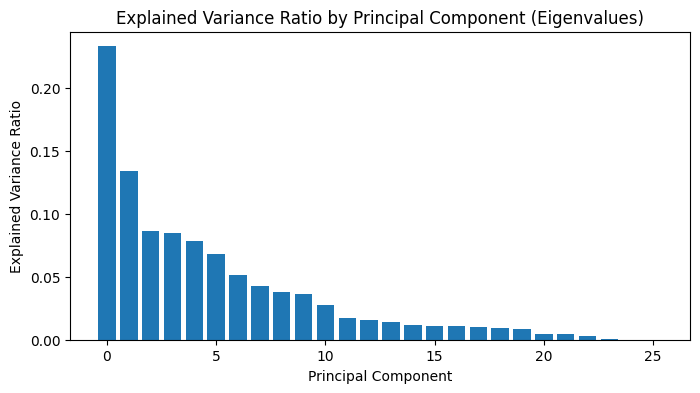

In [52]:
# Visualize eigenvalues
plt.figure(figsize=(8, 4))
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component (Eigenvalues)')
plt.show()

In [47]:
df7.shape

(2240, 26)

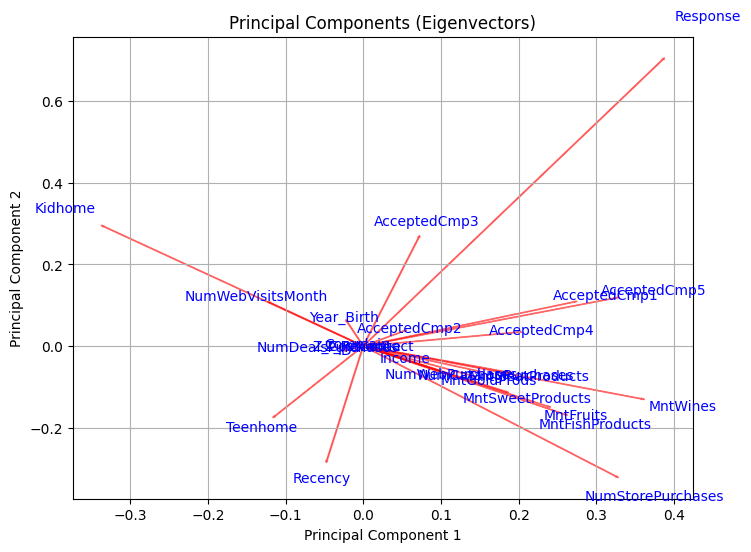

In [54]:
# Visualize eigenvectors

feature_names = df7.columns.tolist()

plt.figure(figsize=(8, 6))
for i in range(len(pca.components_)):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='r', alpha=0.5)
    plt.text(pca.components_[0, i] * 1.15, pca.components_[1, i] * 1.15,
             feature_names[i], color='b', ha='center', va='center')
# plt.xlim(-1, 1)
# plt.ylim(-1, 1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Components (Eigenvectors)')
plt.grid()
plt.show()

In [51]:
feature_names

['ID',
 'Year_Birth',
 'Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response']